In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('vgsales.csv')
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [52]:
year_max_df = pd.DataFrame(data.groupby(by=['Year', 'Genre']).size().reset_index(name='count'))
#Agrupamos en año y genero, luego aplicamos .size() para ver cuanto se repite cada (year, genre) y reseteammos el index
#agregando al final la columna count

year_max_df


,Year,Genre,count
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1980.0,Sports,1
...,...,...,...
370,2015.0,Role-Playing,78
371,2015.0,Shooter,34
372,2015.0,Simulation,15
373,2015.0,Sports,62


In [53]:
x =year_max_df.groupby(['Year'])['count'].transform(max)
# aplicamos MAX a cada AÑO en la columna COUNT por ej , el año 1980 el valor más grande de count fue 4 entonces en todo
#(year, genre) se pone el valor 4
x

0        4
1        4
2        4
3        4
4        4
      ... 
370    255
371    255
372    255
373    255
374    255
Name: count, Length: 375, dtype: int64

In [54]:
year_max_df['count']

0       1
1       1
2       4
3       2
4       1
       ..
370    78
371    34
372    15
373    62
374    17
Name: count, Length: 375, dtype: int64

In [55]:
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_idx
#Ahora sabiendo lo del transform max y teniendo el df year_max['count'] podemos ver en DONDE está el maximo de respecto a c/gen

0      False
1      False
2       True
3      False
4      False
       ...  
370    False
371    False
372    False
373    False
374    False
Name: count, Length: 375, dtype: bool

In [56]:
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
#ACA pasamos al df original (year,genre) el df con los valores False y True con TRUE donde se encuentra el valor maximo de c/año
#Entonces estamos filtrando los lugares donde se encuentra el genero que más se estrenó por año y reseteamos el index
year_max_genre

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Puzzle,3
5,1984.0,Racing,3
6,1984.0,Shooter,3
7,1985.0,Platform,4
8,1985.0,Puzzle,4
9,1986.0,Action,6


In [57]:
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
#Acá eliminamos los repetidos (ya que podían haber varios con el mismo cantidad de realesed) y dejamos el ultimo en las repes
#ademas de resetear el index
year_max_genre

,Year,Genre,count
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Shooter,3
5,1985.0,Puzzle,4
6,1986.0,Platform,6
7,1987.0,Sports,4
8,1988.0,Platform,4
9,1989.0,Puzzle,5


In [58]:
genre = year_max_genre['Genre'].values
#Hacemos esto para obtener los indices ordenados de nuestra tabla final
genre

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

Text(0, 0.5, 'Count')

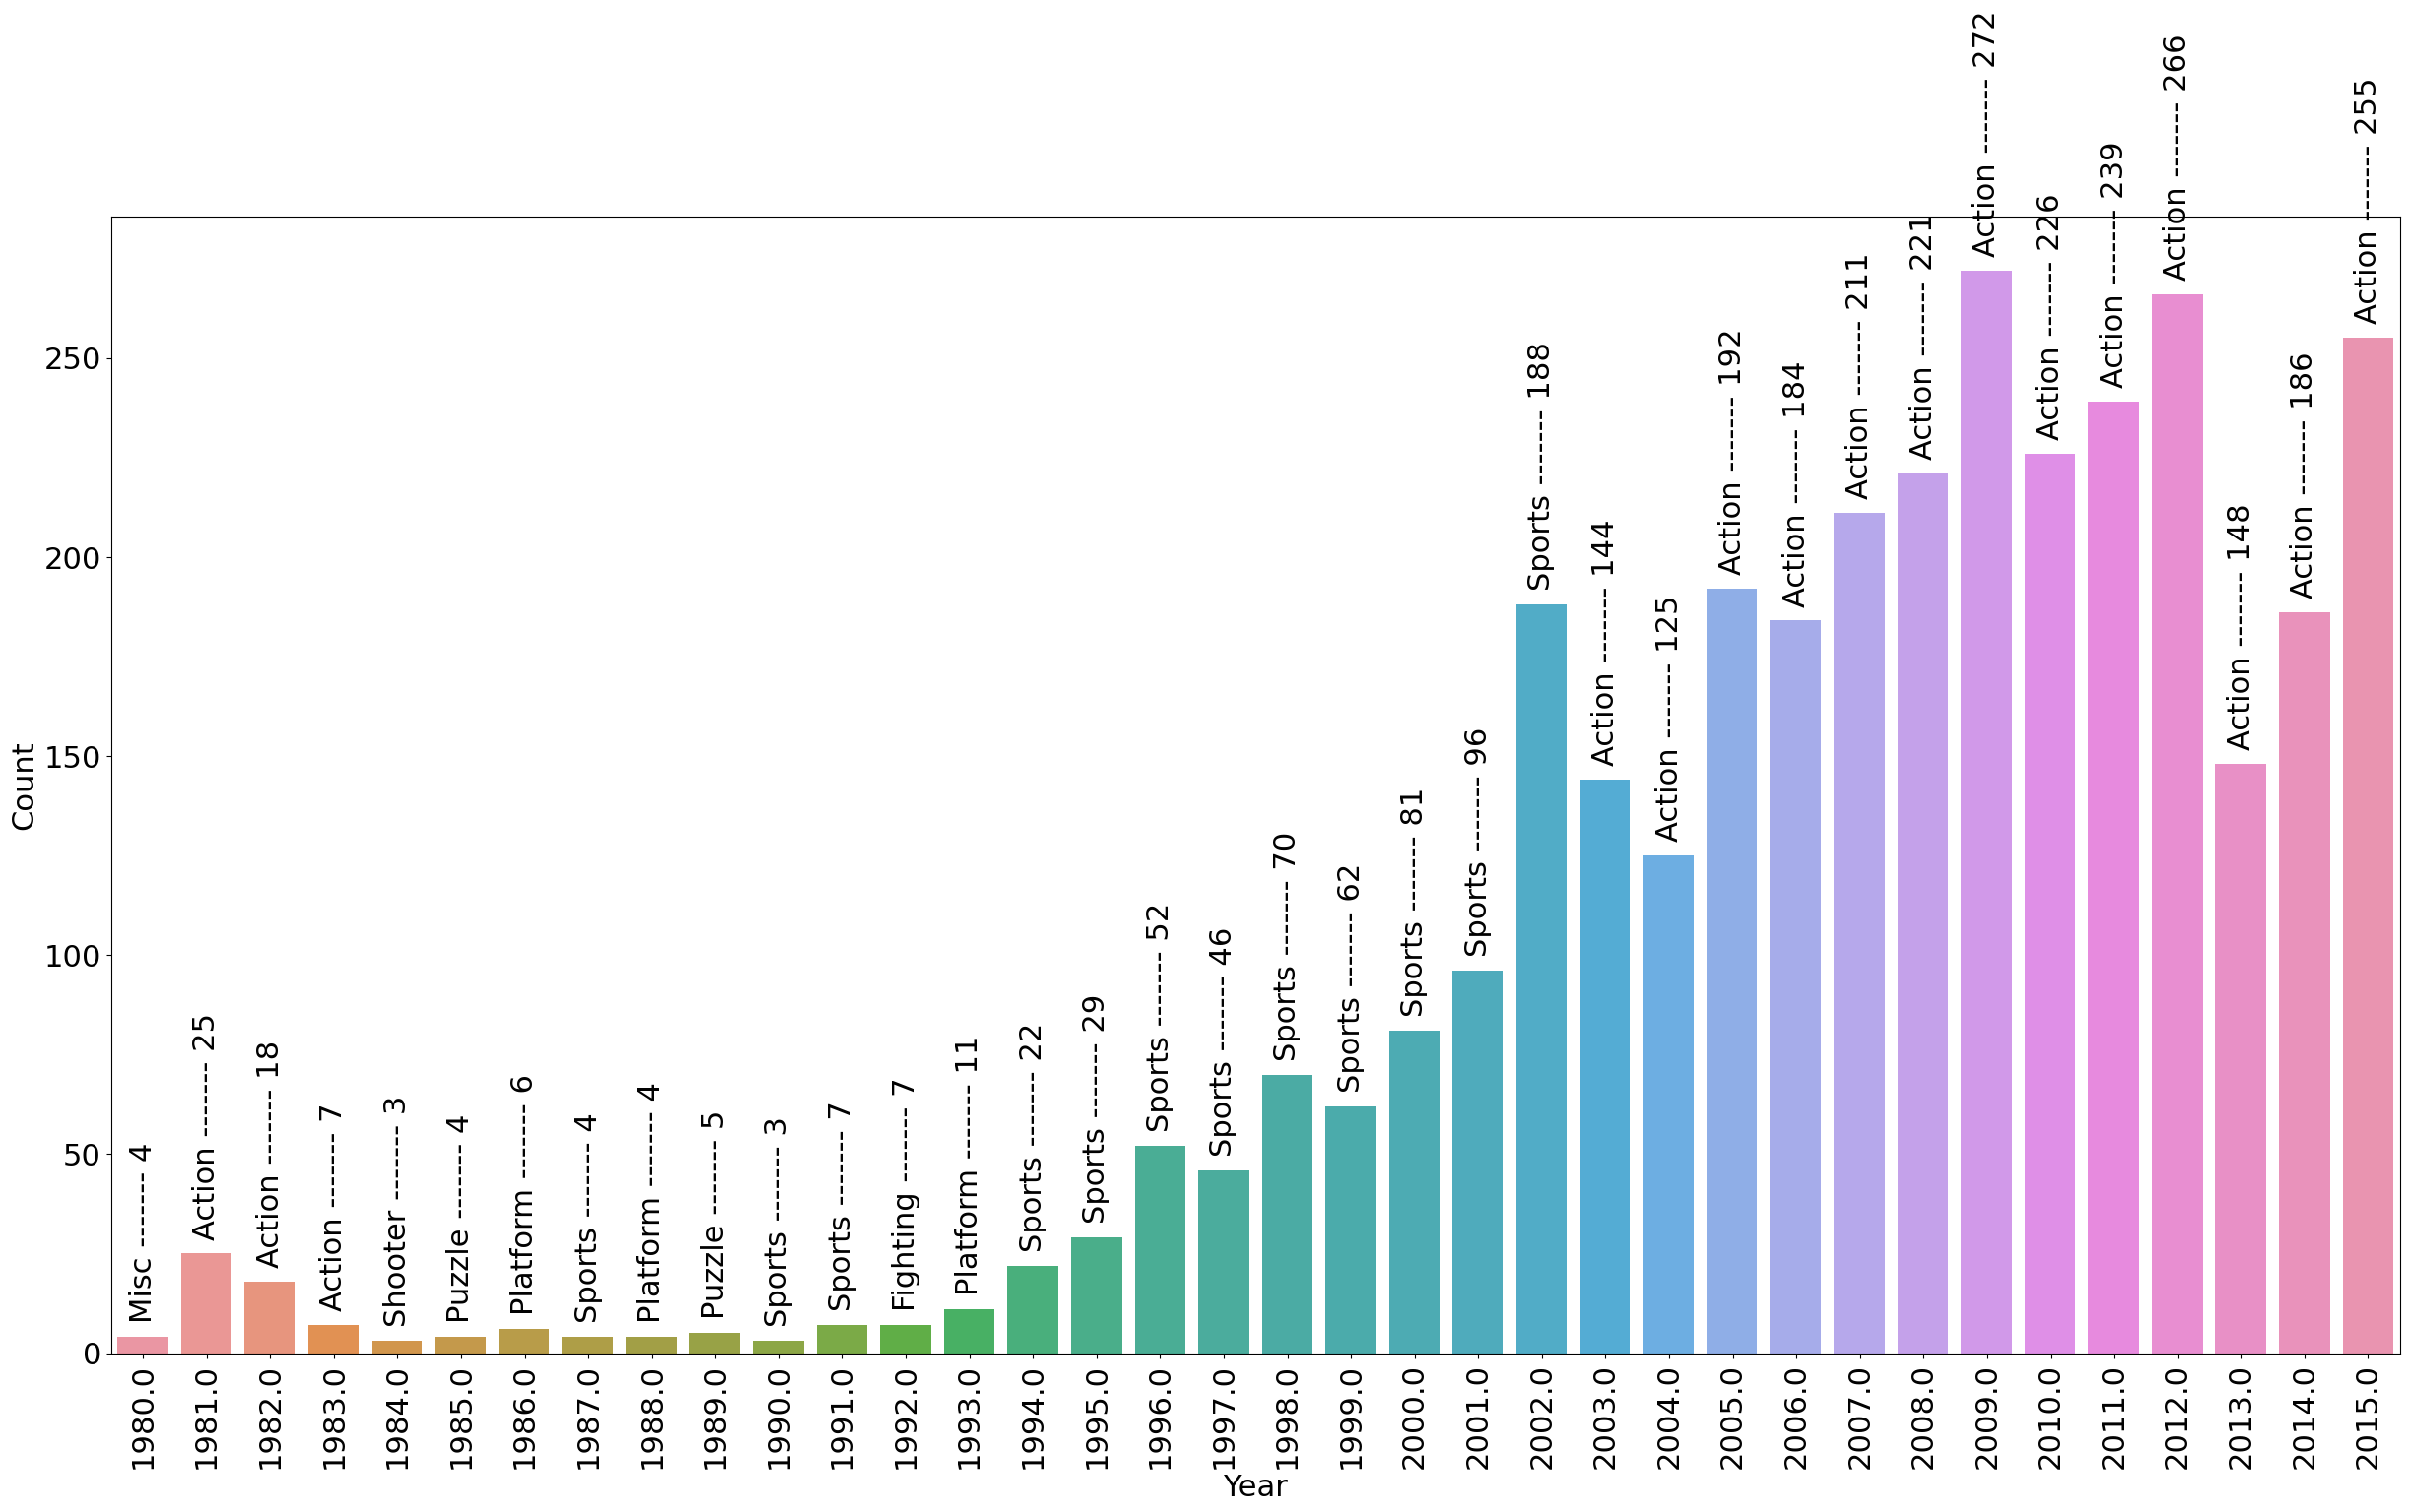

In [67]:
plt.figure(figsize=(30,15))
g = sns.barplot(x='Year', y='count', data= year_max_genre)
index =0
for value in year_max_genre['count'].values:
    g.text(index, value +5, str(genre[index] + ' ------- '+ str(value)), color='#000', size=22, rotation= 90, ha="center")
    index +=1
plt.xticks(size=22, rotation=90)
plt.yticks(size=22)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Count', fontsize=22)


In [18]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Quiero obtener las estadisticas de las ventas GLOBALES por AÑO

Text(0, 0.5, 'Count')

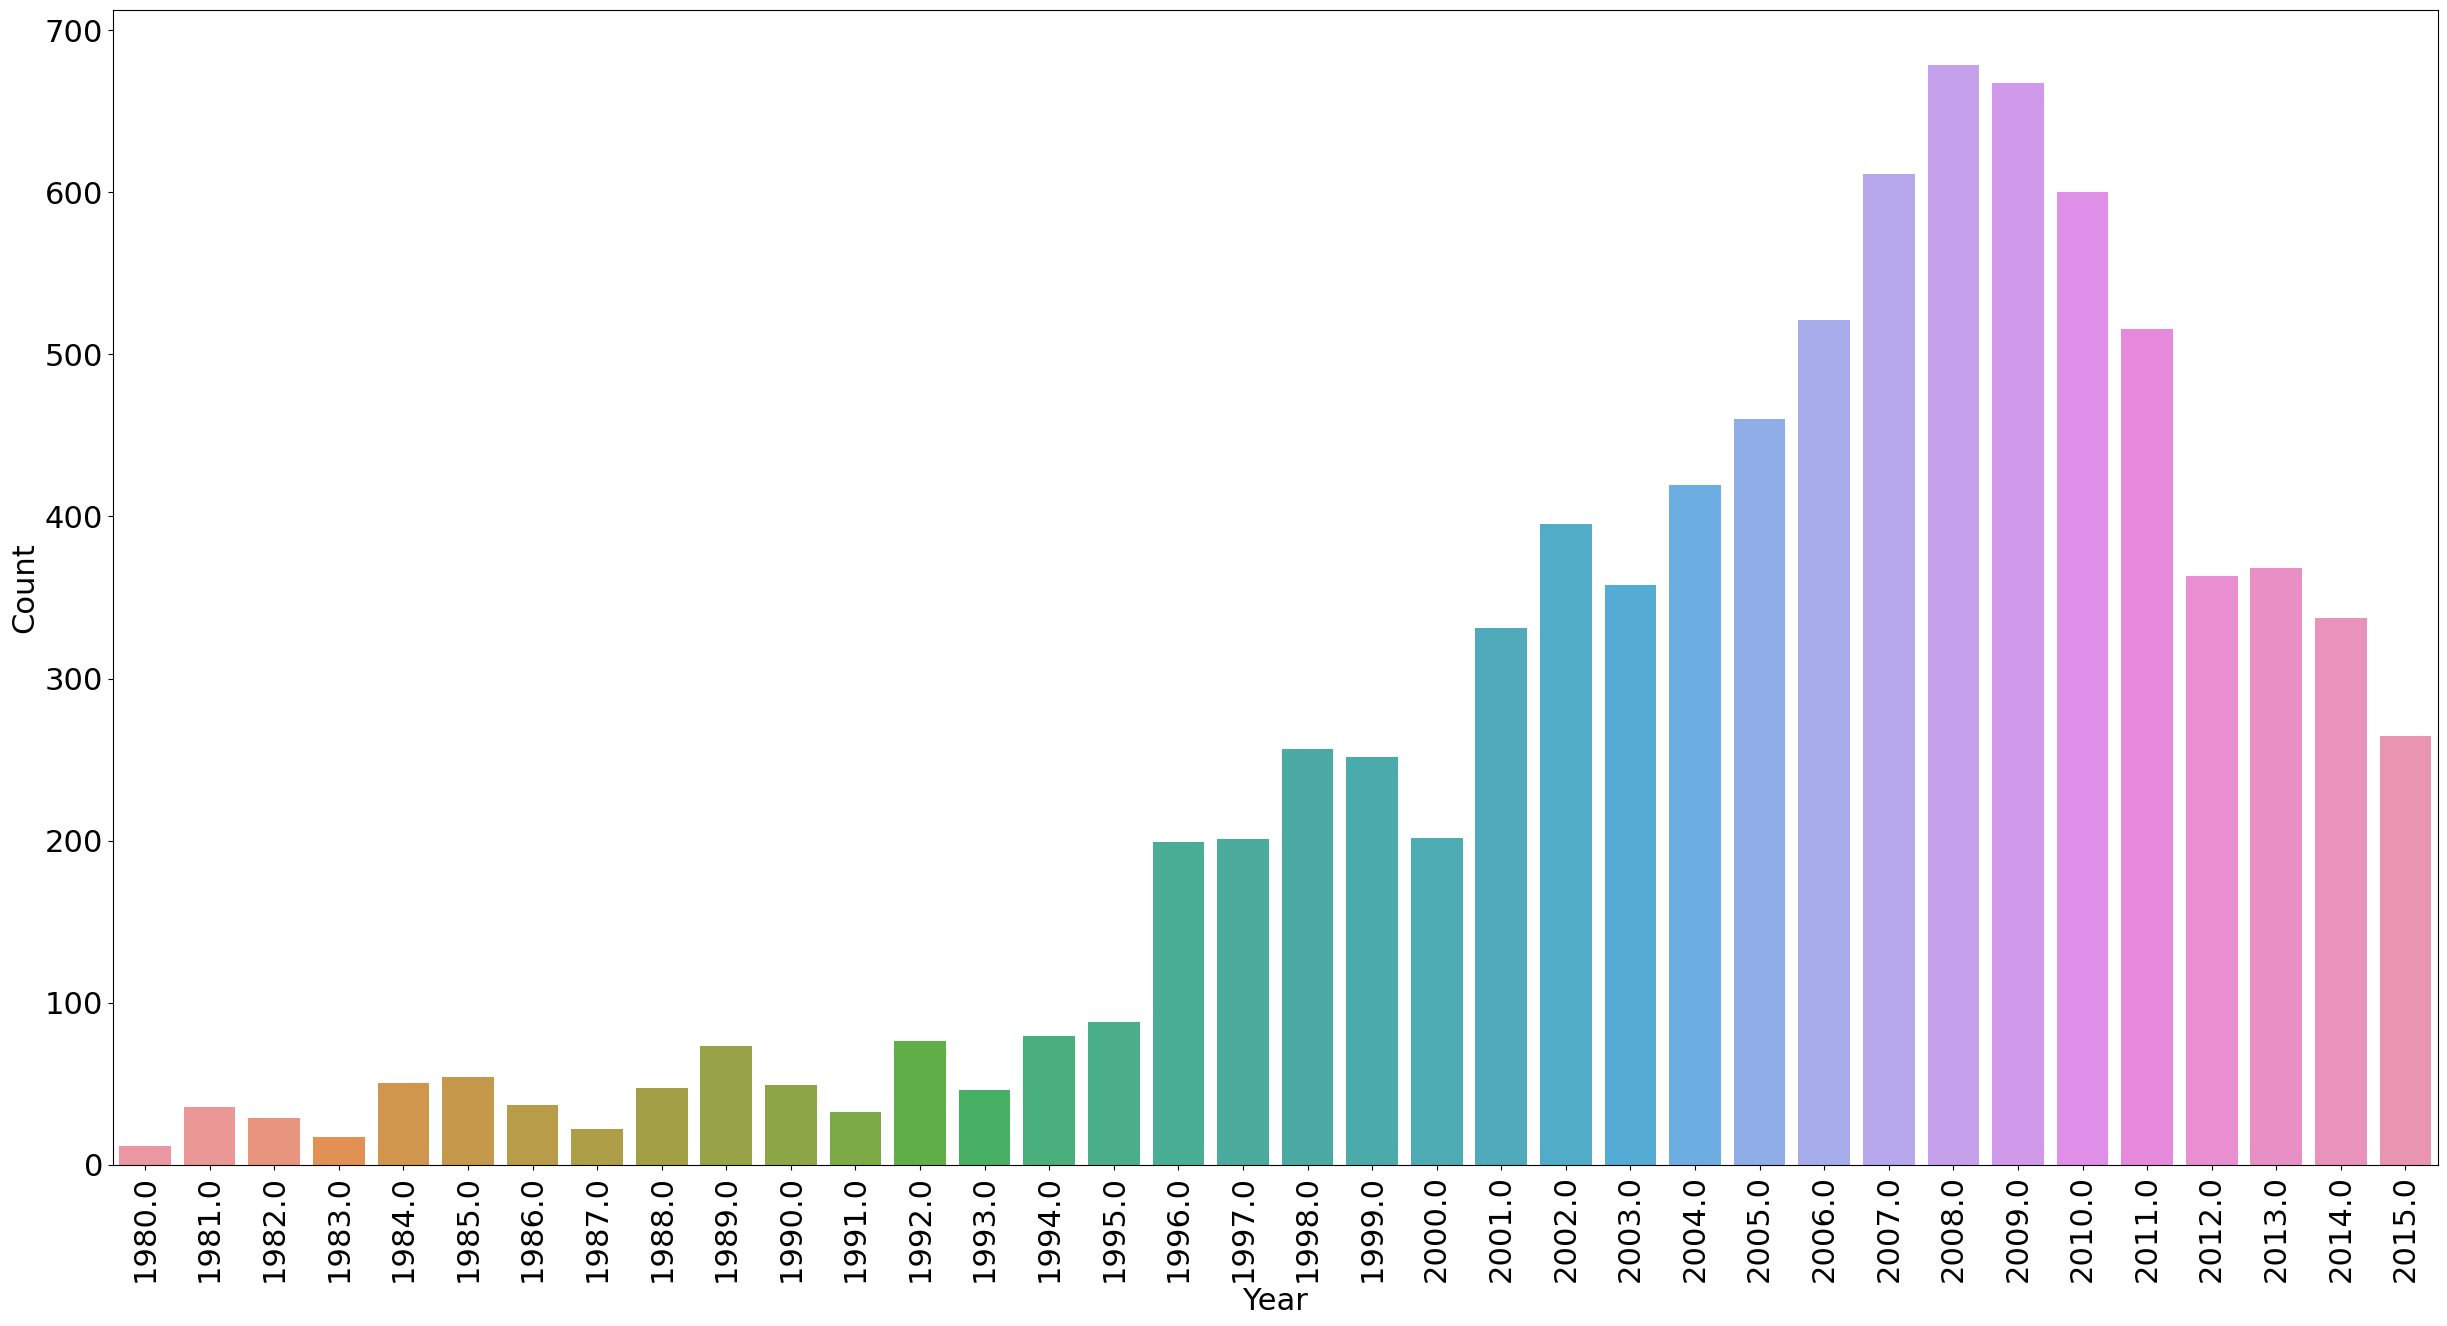

In [2]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = pd.DataFrame(data_year.reset_index())


plt.figure(figsize=(30,15))
sns.barplot(data=data_year, x='Year', y='Global_Sales' )
plt.xticks(size=22, rotation=90)
plt.yticks(size=22)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Count', fontsize=22)

# LAS MARCAS DE PUBLICANTES QUE MÁS PUBLICÓ HISTÓRICO

In [3]:
data_publisher = data['Publisher'].value_counts()
data_publisher = pd.DataFrame(data_publisher.reset_index())
data_publisher = data_publisher[data_publisher['Publisher'] > 20]
data_publisher

,index,Publisher
0,Electronic Arts,1331
1,Activision,961
2,Ubisoft,907
3,Namco Bandai Games,892
4,Konami Digital Entertainment,824
...,...,...
79,JoWood Productions,22
80,Oxygen Interactive,22
81,Kemco,21
82,Paradox Interactive,21


Text(0, 0.5, 'Count')

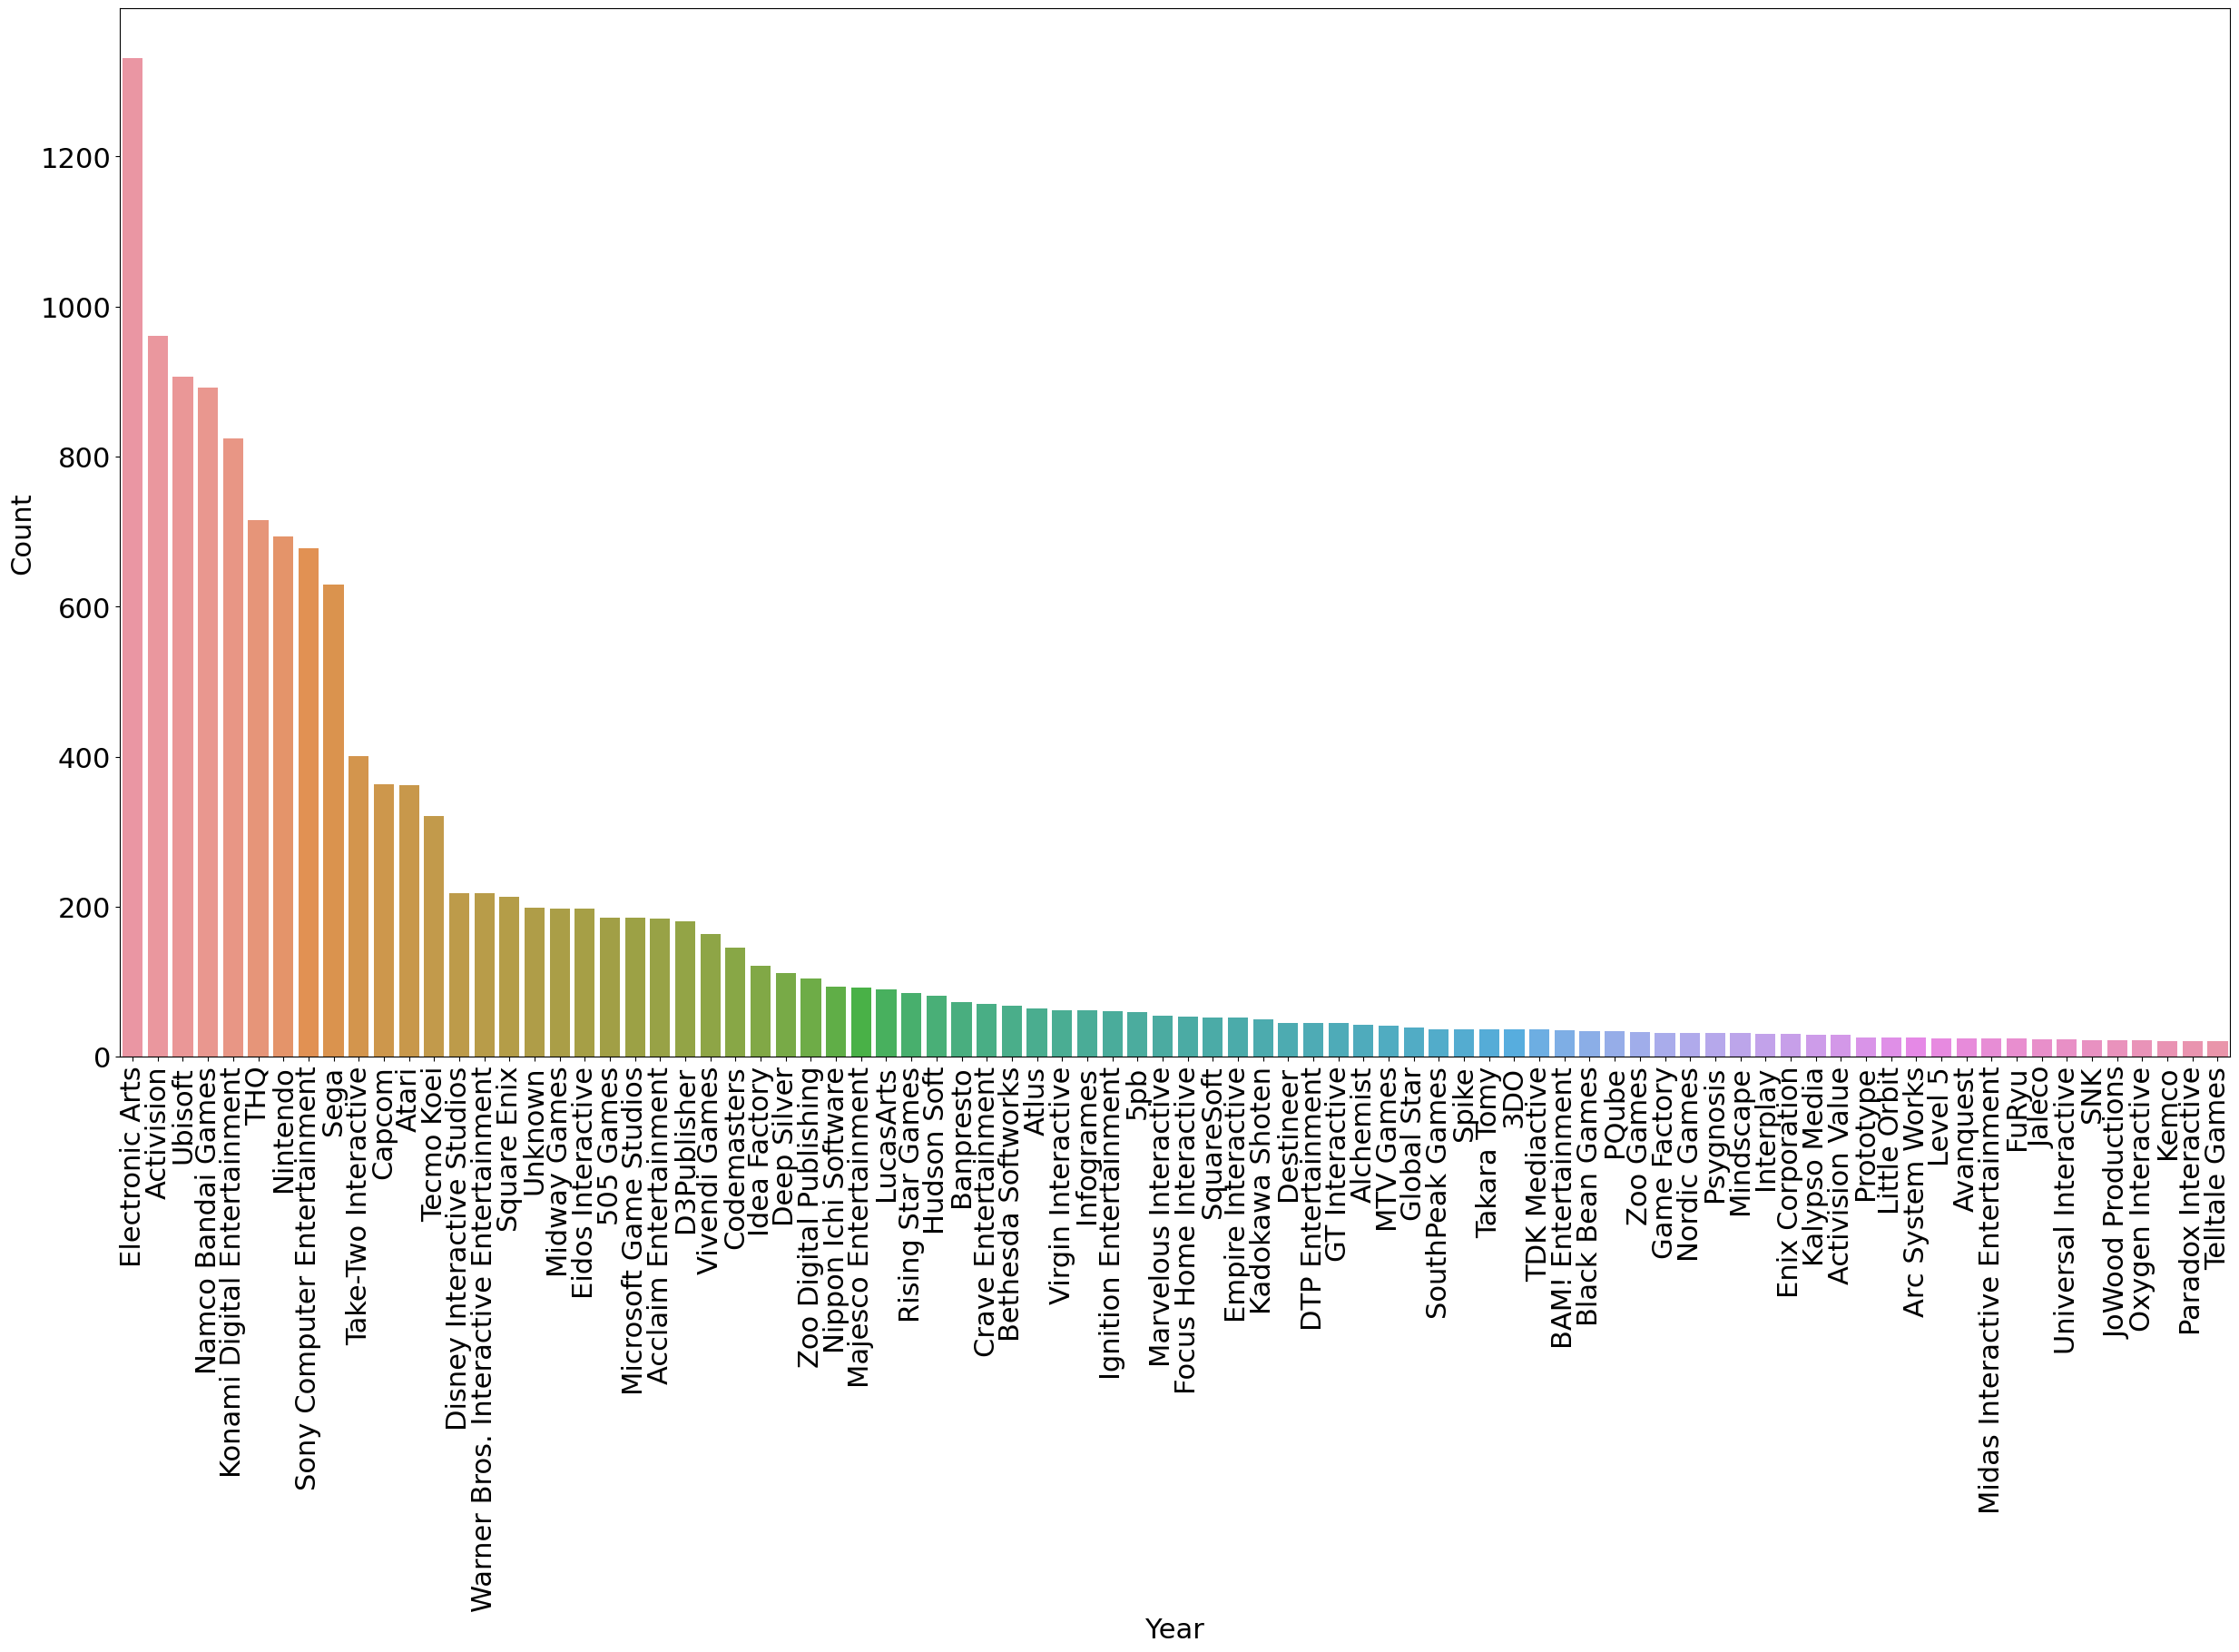

In [4]:
plt.figure(figsize=(30,15))
sns.barplot(data=data_publisher, x='index', y='Publisher' )
plt.xticks(size=22, rotation=90)
plt.yticks(size=22)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Count', fontsize=22)

# TOP PLATAFORMAS CON ESTRENOS POR AÑO

In [5]:
data_year = data.groupby(['Year','Platform']).size().reset_index(name='Count')
data_year = pd.DataFrame(data_year)
data_year

,Year,Platform,Count
0,1980.0,2600,9
1,1981.0,2600,46
2,1982.0,2600,36
3,1983.0,2600,11
4,1983.0,NES,6
...,...,...,...
225,2015.0,PSV,113
226,2015.0,Wii,4
227,2015.0,WiiU,28
228,2015.0,X360,40


In [6]:
data_year_idx = data_year.groupby(['Year'])['Count'].transform(max) == data_year['Count']
data_year_idx

0       True
1       True
2       True
3       True
4      False
       ...  
225    False
226    False
227    False
228    False
229    False
Name: Count, Length: 230, dtype: bool

In [7]:
data_year_max = data_year[data_year_idx].reset_index(drop=True)
data_year_max

,Year,Platform,Count
0,1980.0,2600,9
1,1981.0,2600,46
2,1982.0,2600,36
3,1983.0,2600,11
4,1984.0,NES,13
5,1985.0,NES,11
6,1986.0,NES,19
7,1987.0,NES,10
8,1988.0,NES,11
9,1989.0,GB,10


In [8]:
platforms = data_year_max['Platform'].values
platforms

array(['2600', '2600', '2600', '2600', 'NES', 'NES', 'NES', 'NES', 'NES',
       'GB', 'NES', 'SNES', 'SNES', 'SNES', 'SNES', 'PS', 'PS', 'PS',
       'PS', 'PS', 'PS', 'PS2', 'PS2', 'PS2', 'PS2', 'PS2', 'PS2', 'DS',
       'DS', 'DS', 'DS', 'PS3', 'PS3', 'PS3', 'PS3', 'PS4'], dtype=object)

Text(0, 0.5, 'Count')

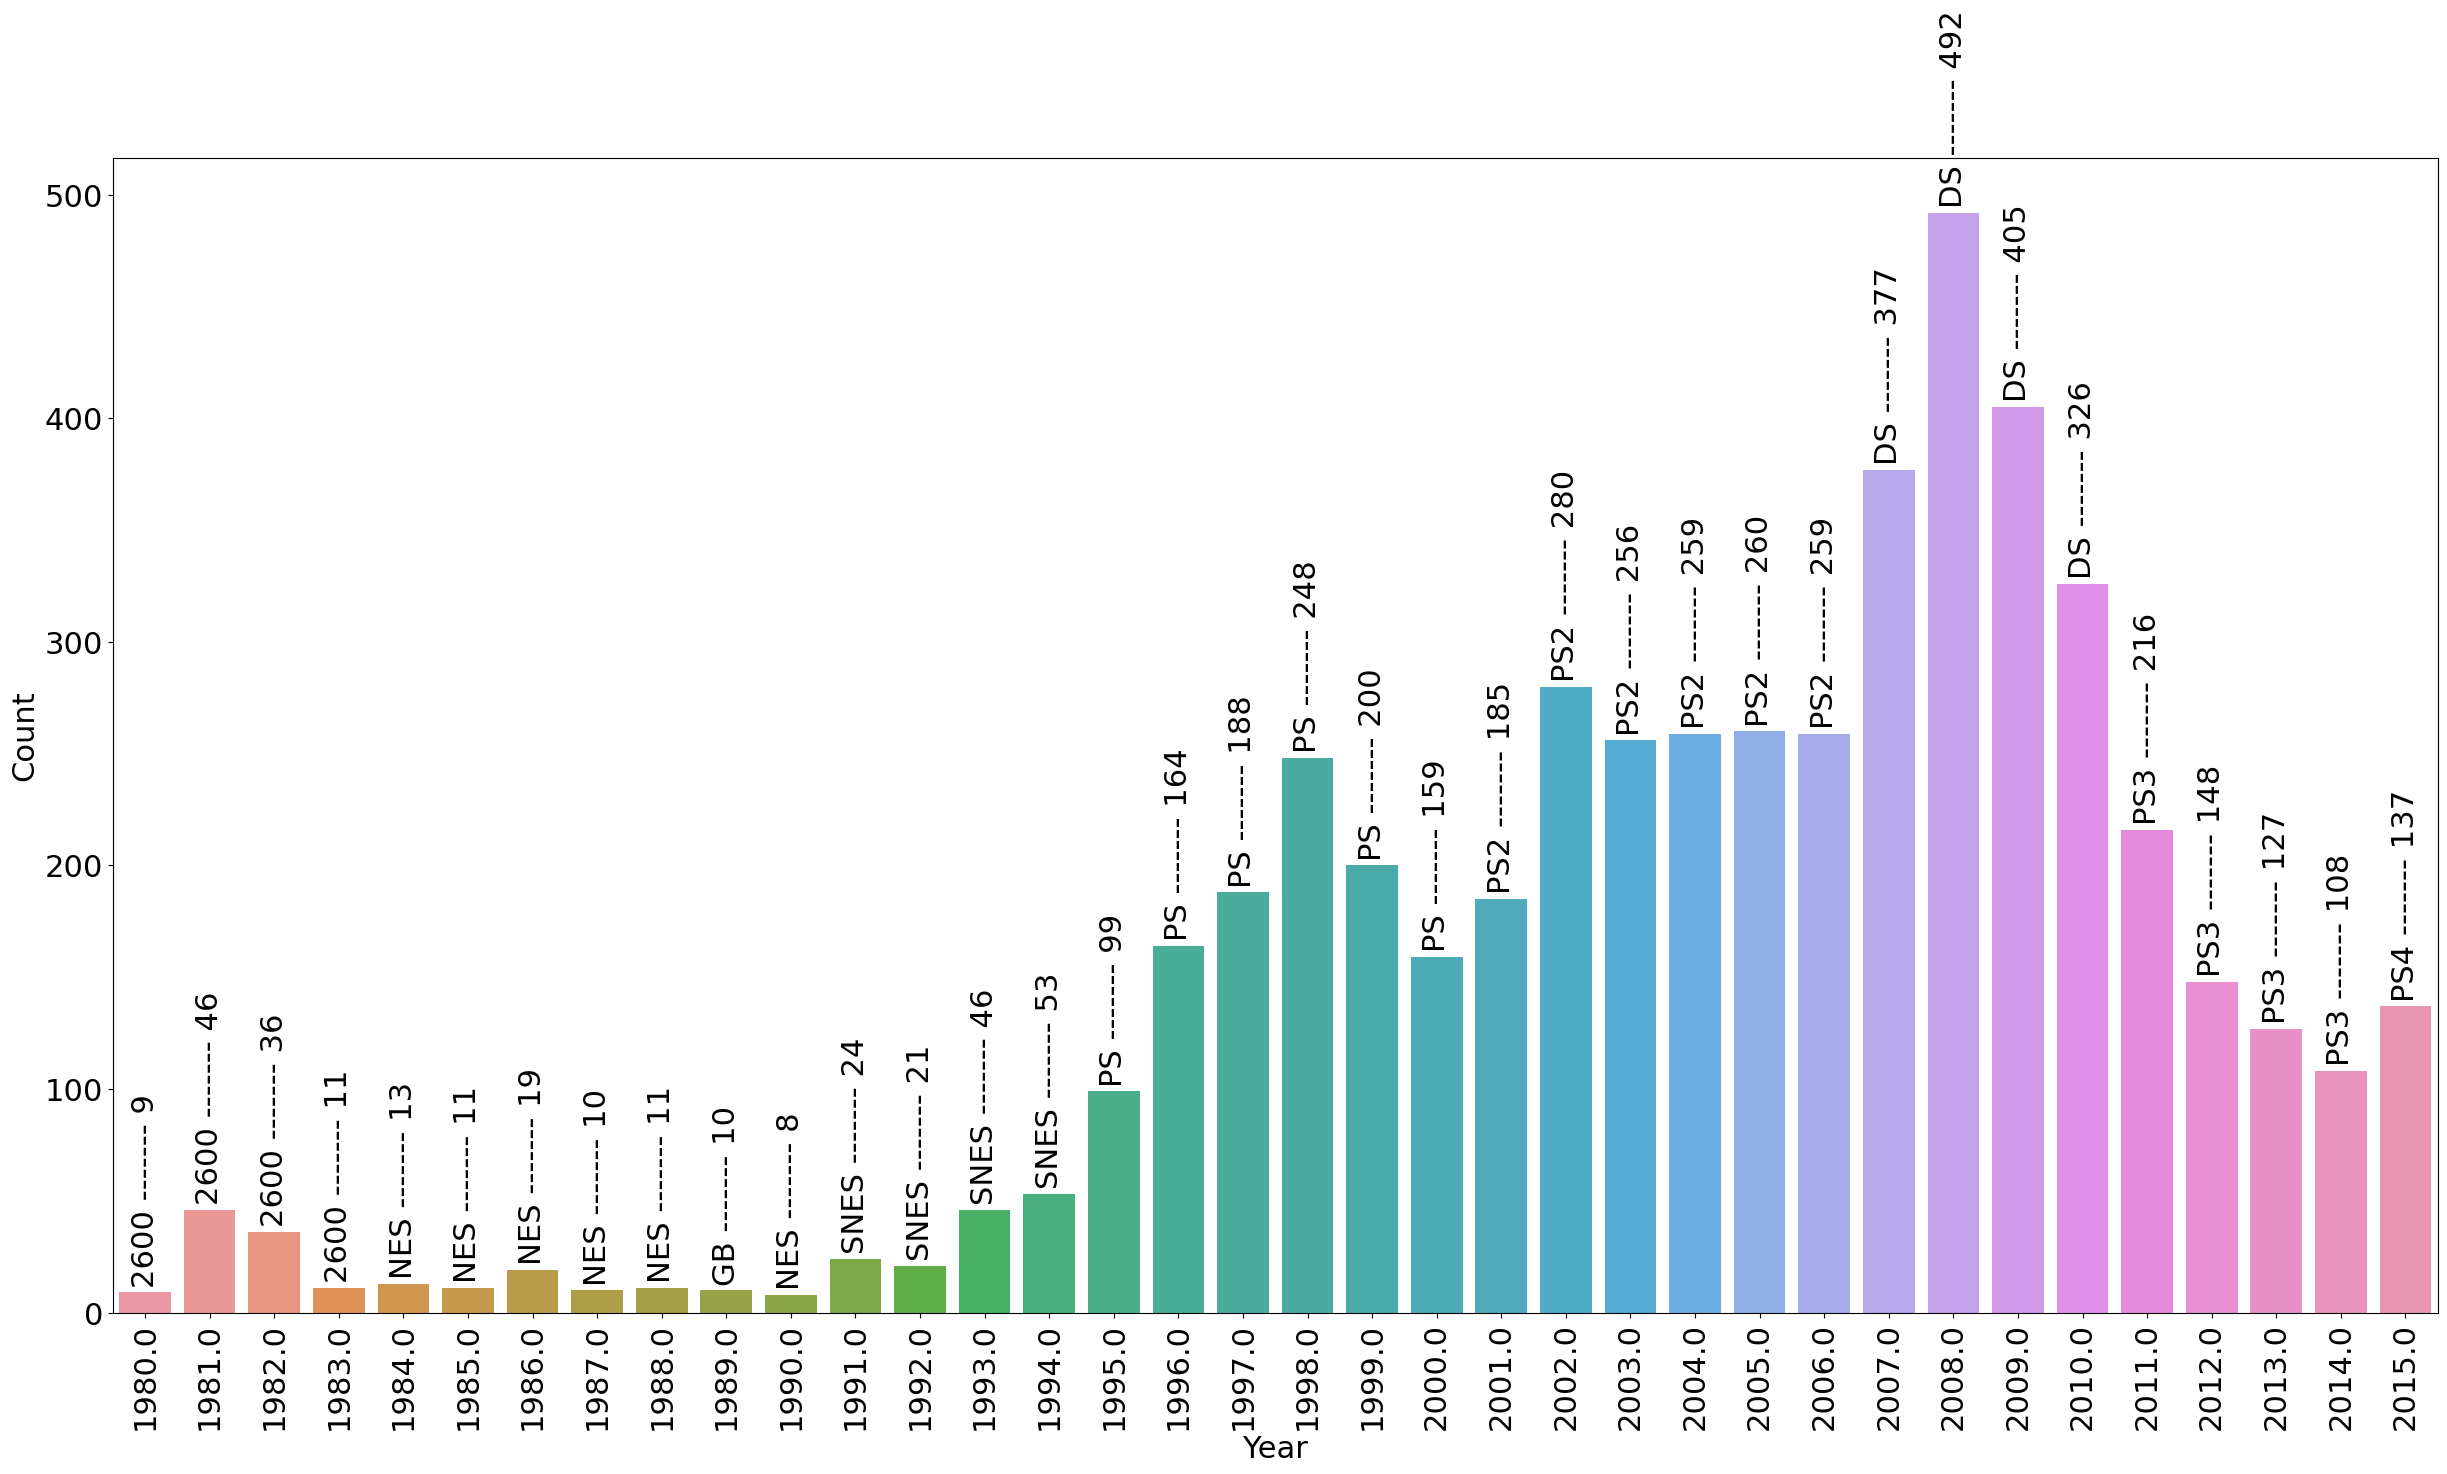

In [9]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=data_year_max)
index =0
for value in data_year_max['Count'].values:
    g.text(index, value +5, str(platforms[index] + ' ------- '+ str(value)), color='#000', size=22, rotation= 90, ha="center")
    index +=1
plt.xticks(size=22, rotation=90)
plt.yticks(size=22)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Count', fontsize=22)

# Which genre game have the highest sale price globally

In [10]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

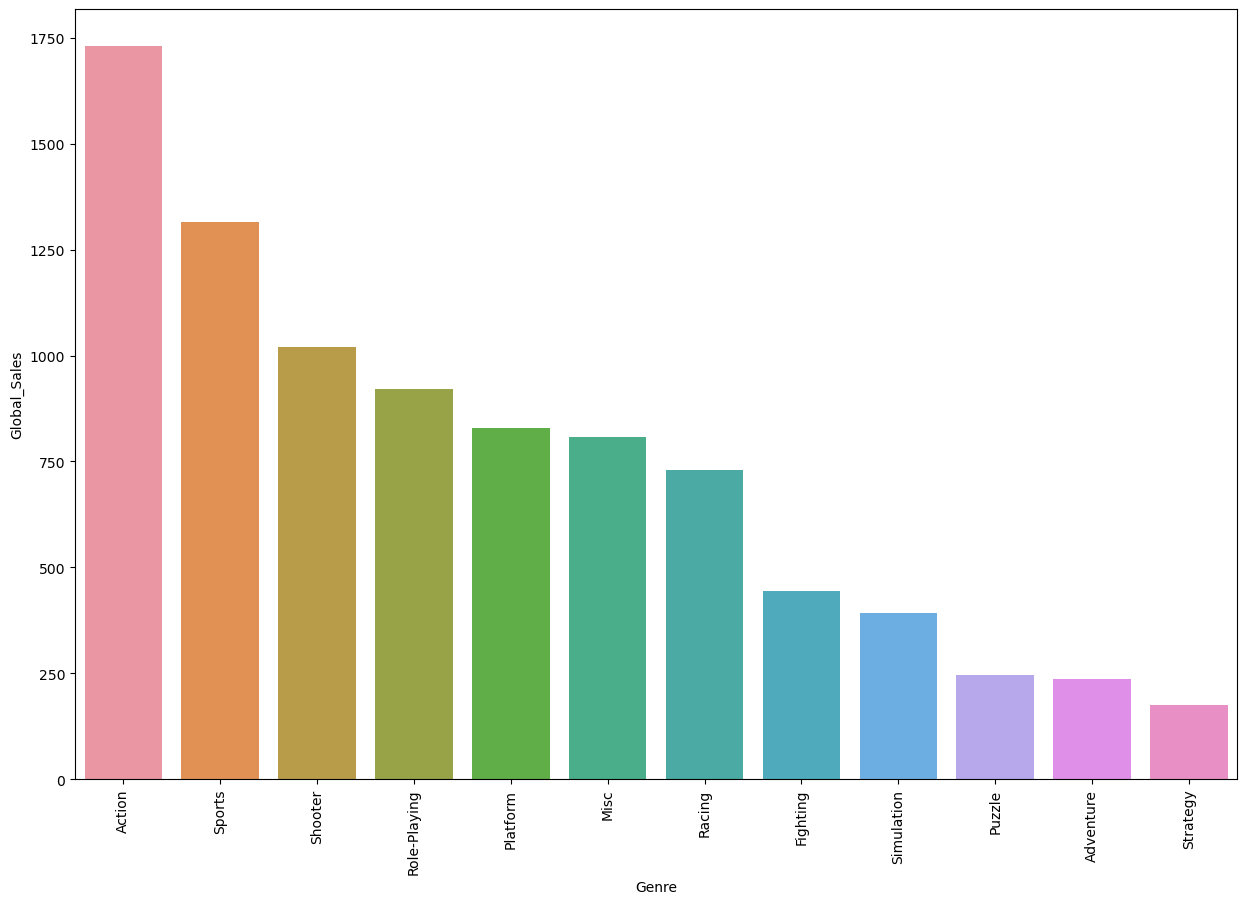

In [11]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

In [12]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,30.01
7,Wii Play,2006.0,Misc,29.02
8,New Super Mario Bros. Wii,2009.0,Platform,28.62
9,Duck Hunt,1984.0,Shooter,28.31


In [13]:
import numpy as np
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)
year

0     2006.0
1     1985.0
2     2008.0
3     2009.0
4     1996.0
5     1989.0
6     2006.0
7     2006.0
8     2009.0
9     1984.0
10    2005.0
11    2005.0
12    1999.0
13    2007.0
14    2009.0
15    2010.0
16    2013.0
17    2004.0
18    1990.0
19    2005.0
Name: Year, dtype: float64

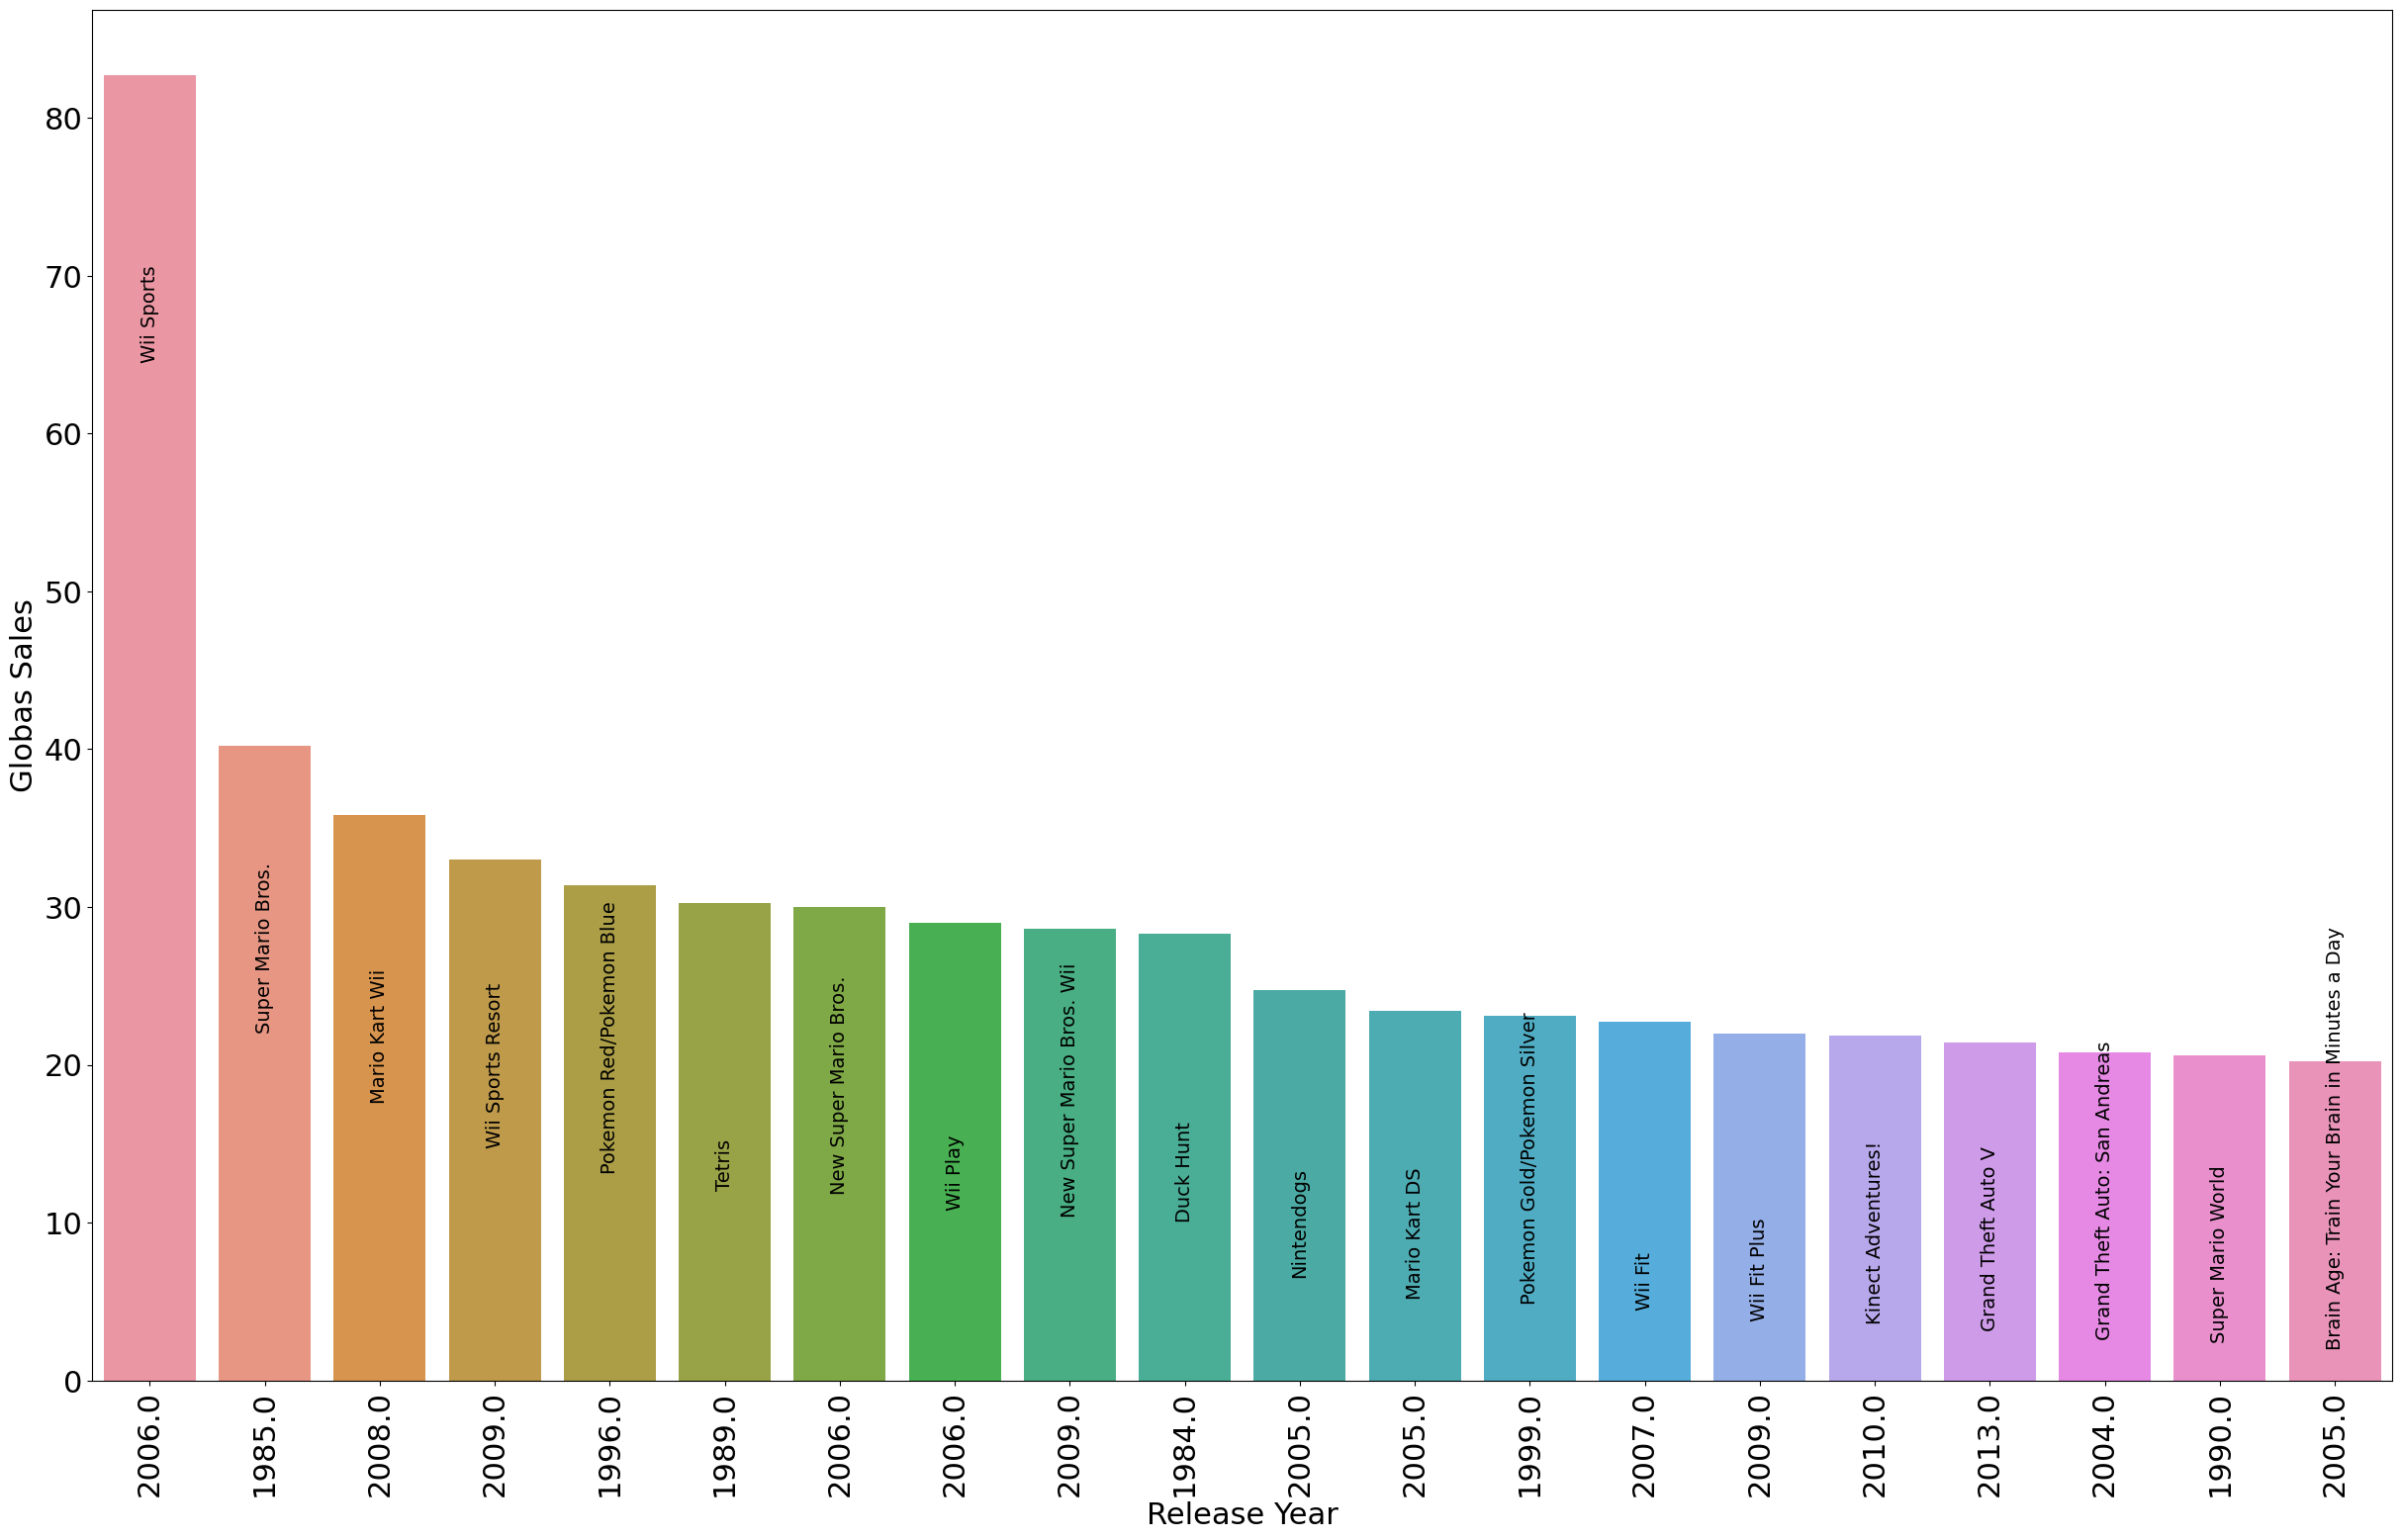

In [14]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)


index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

    
plt.xticks(y, top_game_sale['Year'], fontsize=22, rotation=90)
plt.xlabel('Release Year',fontsize=22)
plt.yticks( fontsize=22)
plt.ylabel('Globas Sales',fontsize=22)
plt.show()

# Comparacion de ventas por genero

In [15]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
#comp_map

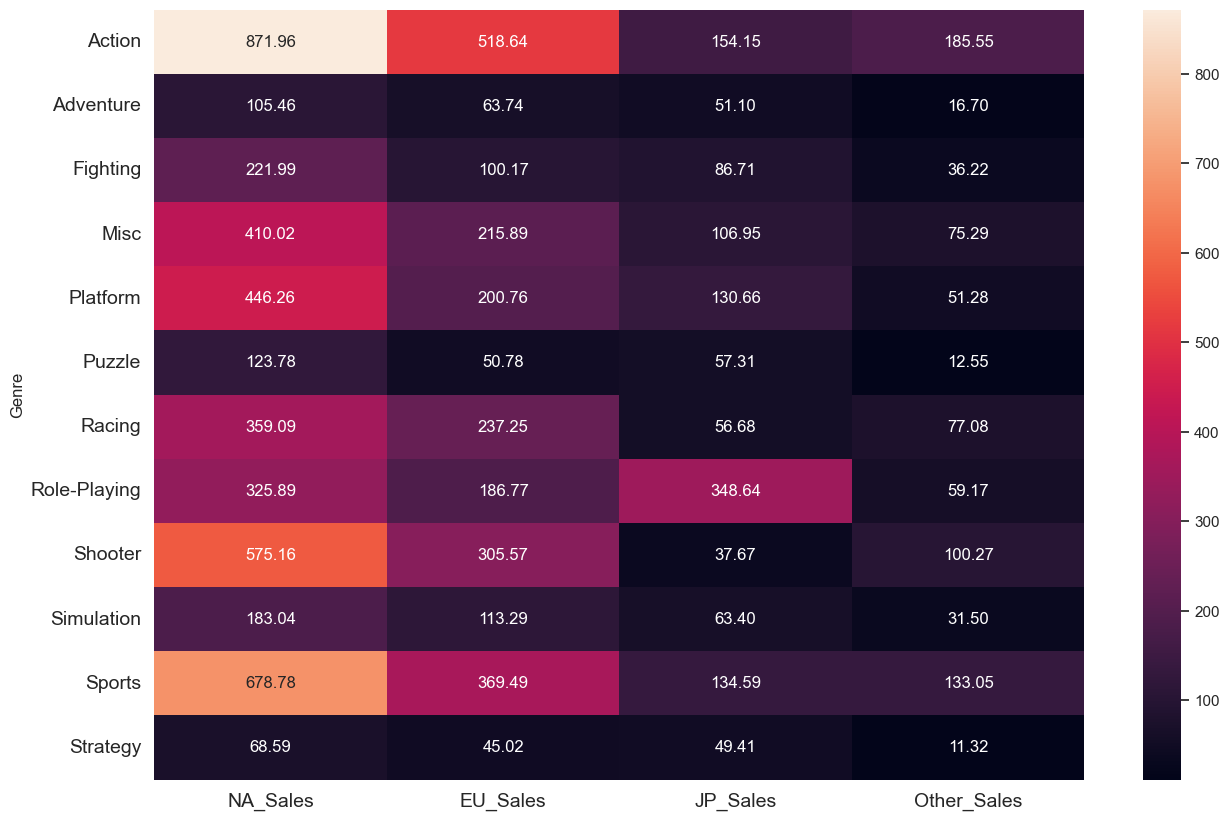

In [16]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.2f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [17]:
comp_map

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,871.96,518.64,154.15,185.55
Adventure,105.46,63.74,51.10,16.70
Fighting,221.99,100.17,86.71,36.22
Misc,410.02,215.89,106.95,75.29
Platform,446.26,200.76,130.66,51.28
Puzzle,123.78,50.78,57.31,12.55
Racing,359.09,237.25,56.68,77.08
Role-Playing,325.89,186.77,348.64,59.17
Shooter,575.16,305.57,37.67,100.27


In [18]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table
#El .melt cambia la división de la vista de la tabla comp_table

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26
5,Puzzle,NA_Sales,123.78
6,Racing,NA_Sales,359.09
7,Role-Playing,NA_Sales,325.89
8,Shooter,NA_Sales,575.16
9,Simulation,NA_Sales,183.04


# Comparacion de ventas por genero

<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

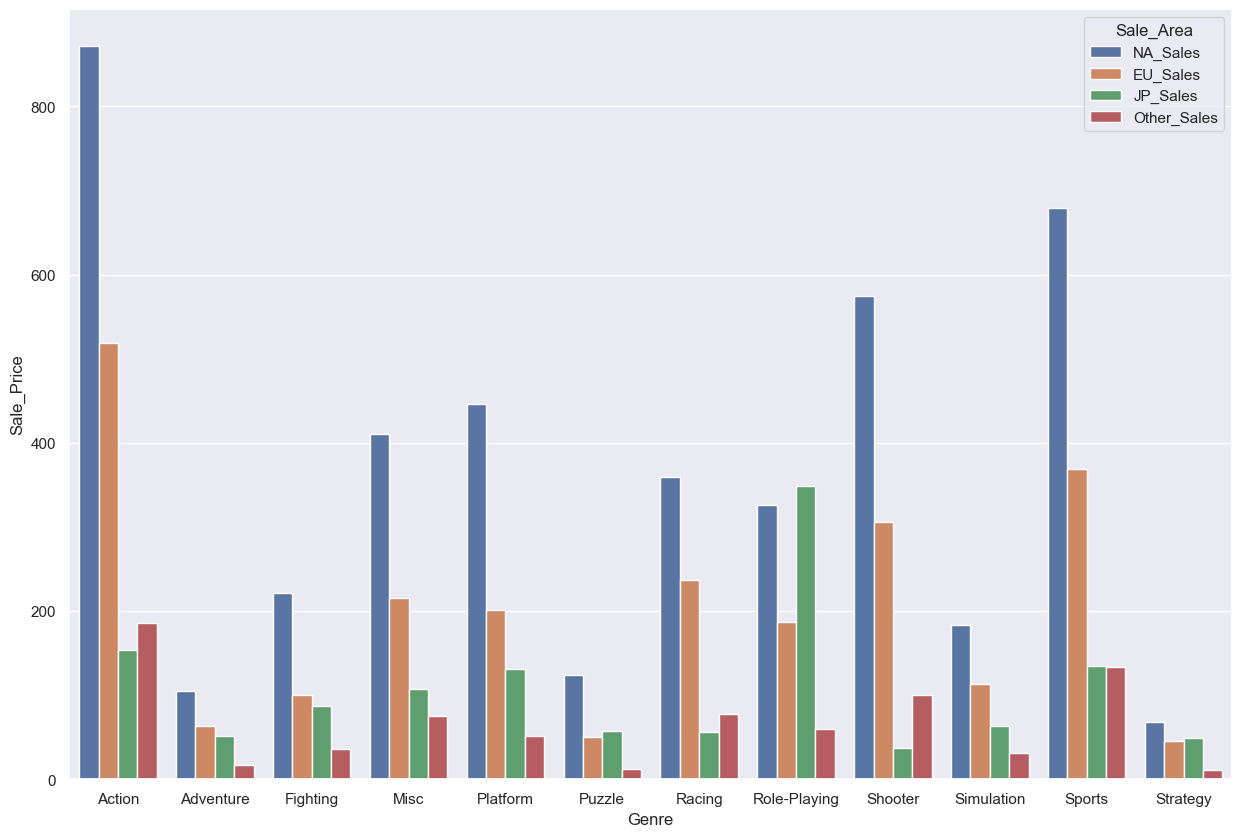

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

# Sales compearison by platform

In [20]:
comp_table = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_table = comp_table.groupby(['Platform']).sum().reset_index()
comp_table = pd.DataFrame(comp_table)
comp_table

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.04,57.95,92.32,12.51
3,DC,5.43,1.69,8.56,0.27
4,DS,390.44,194.65,175.57,60.51
5,GB,114.32,47.82,85.12,8.20
6,GBA,187.54,75.25,47.33,7.73
7,GC,133.46,38.71,21.58,5.18
8,GEN,19.27,5.52,2.67,0.89
9,GG,0.00,0.00,0.04,0.00


In [21]:
comp_table_fin = pd.melt(comp_table, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], value_name='Sales_Price', var_name='Sal_Area')
comp_table_fin

,Platform,Sal_Area,Sales_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44
...,...,...,...
119,Wii,Other_Sales,80.61
120,WiiU,Other_Sales,6.20
121,X360,Other_Sales,85.47
122,XB,Other_Sales,8.72


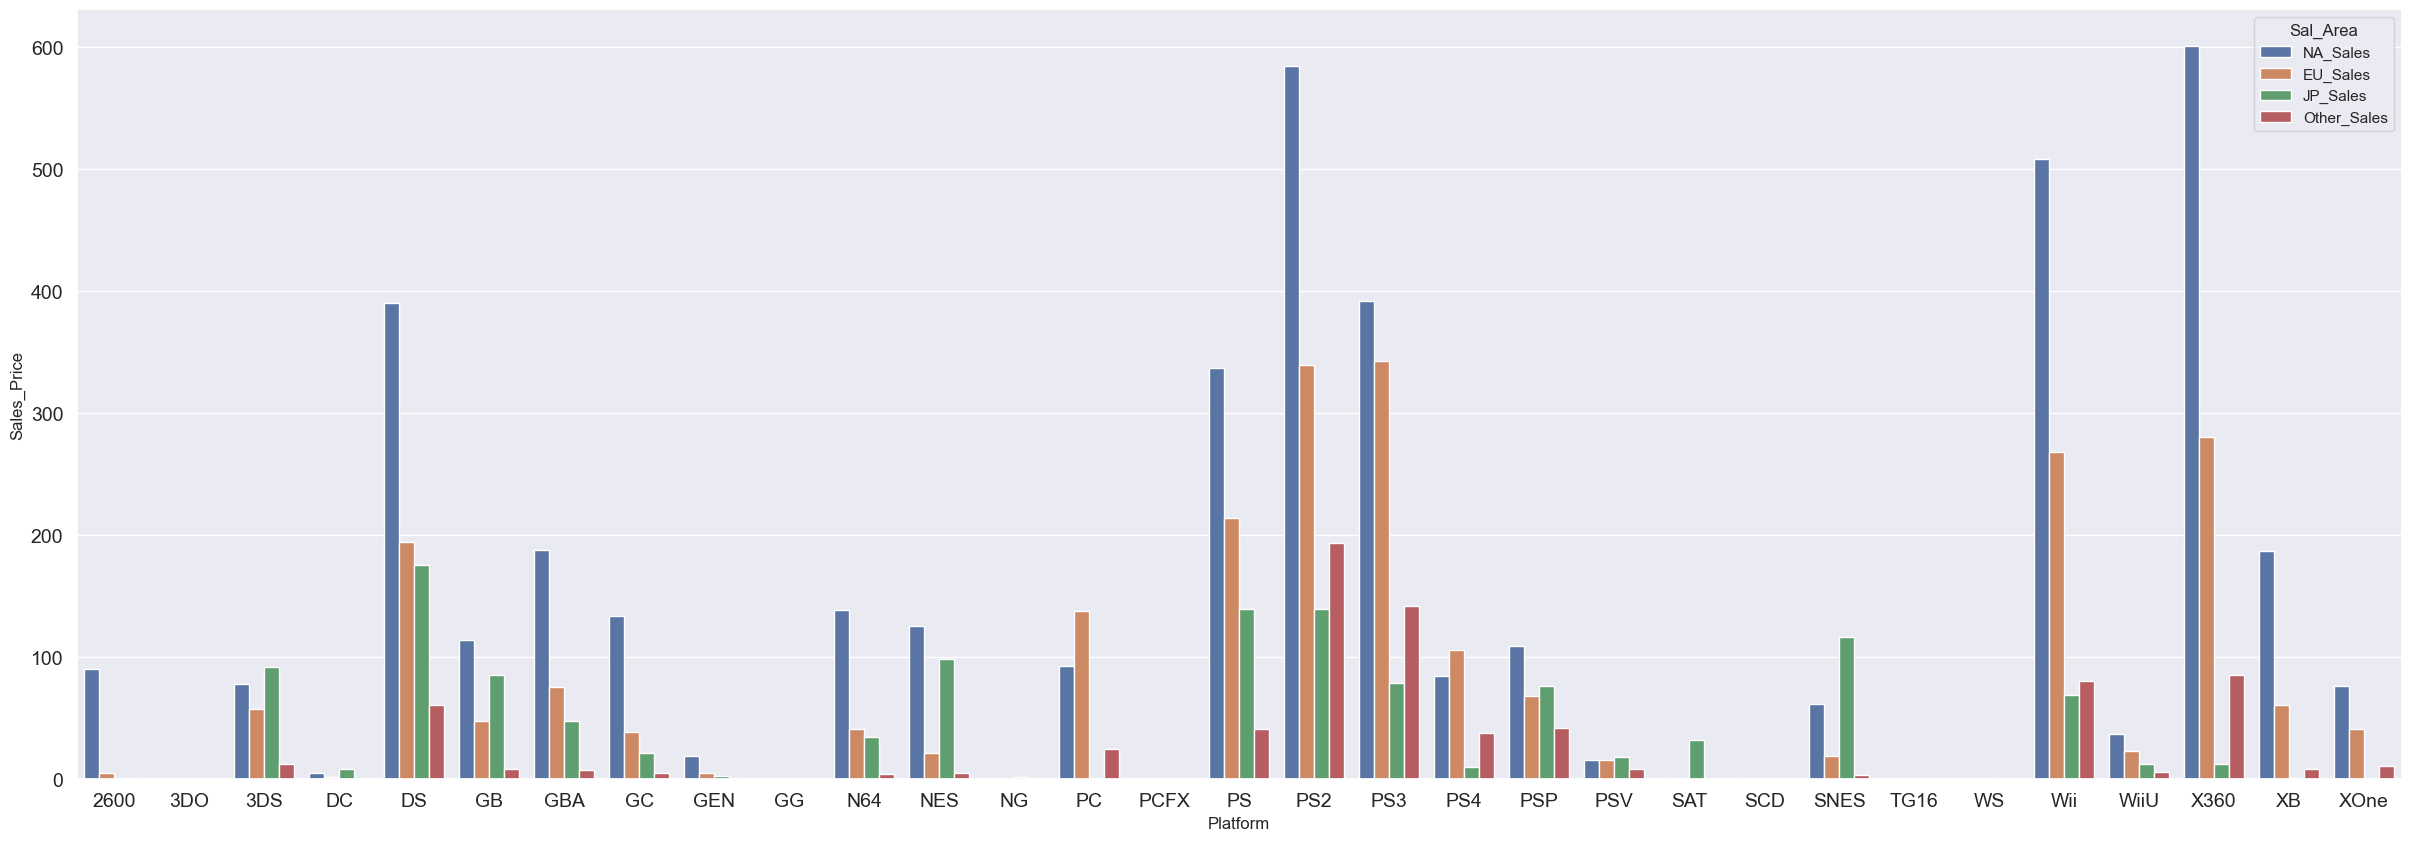

In [22]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Platform', y='Sales_Price', hue='Sal_Area', data=comp_table_fin)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Top 20 PUBLISHERS

In [23]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
top_publisher

,Publisher,Year
0,Electronic Arts,1319
1,Activision,952
2,Ubisoft,904
3,Namco Bandai Games,888
4,Konami Digital Entertainment,815
5,THQ,712
6,Nintendo,686
7,Sony Computer Entertainment,677
8,Sega,622
9,Take-Two Interactive,400


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

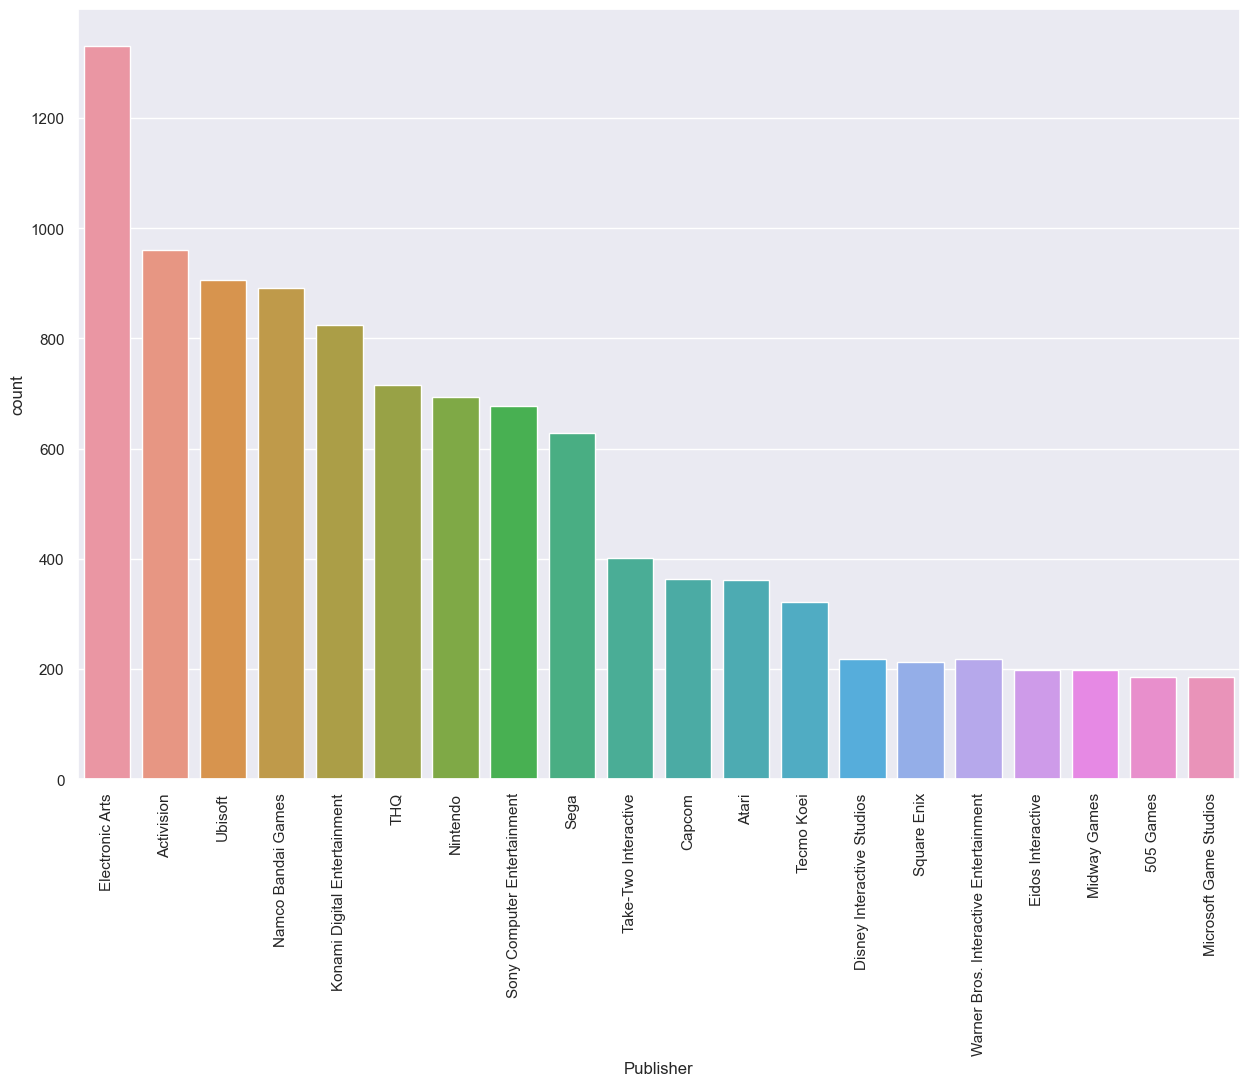

In [24]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Publisher', data=data, order=data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index )
plt.xticks(rotation=90)

# Top global sales by publisher

In [25]:
global_publisher = data.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).reset_index(name='Count')
global_publisher = pd.DataFrame(global_publisher)
global_publisher = global_publisher[:20]
global_publisher

,Publisher,Count
0,Nintendo,1783.09
1,Electronic Arts,1098.07
2,Activision,723.79
3,Sony Computer Entertainment,600.94
4,Ubisoft,464.67
5,Take-Two Interactive,396.65
6,THQ,340.77
7,Konami Digital Entertainment,282.43
8,Sega,272.18
9,Namco Bandai Games,247.60


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

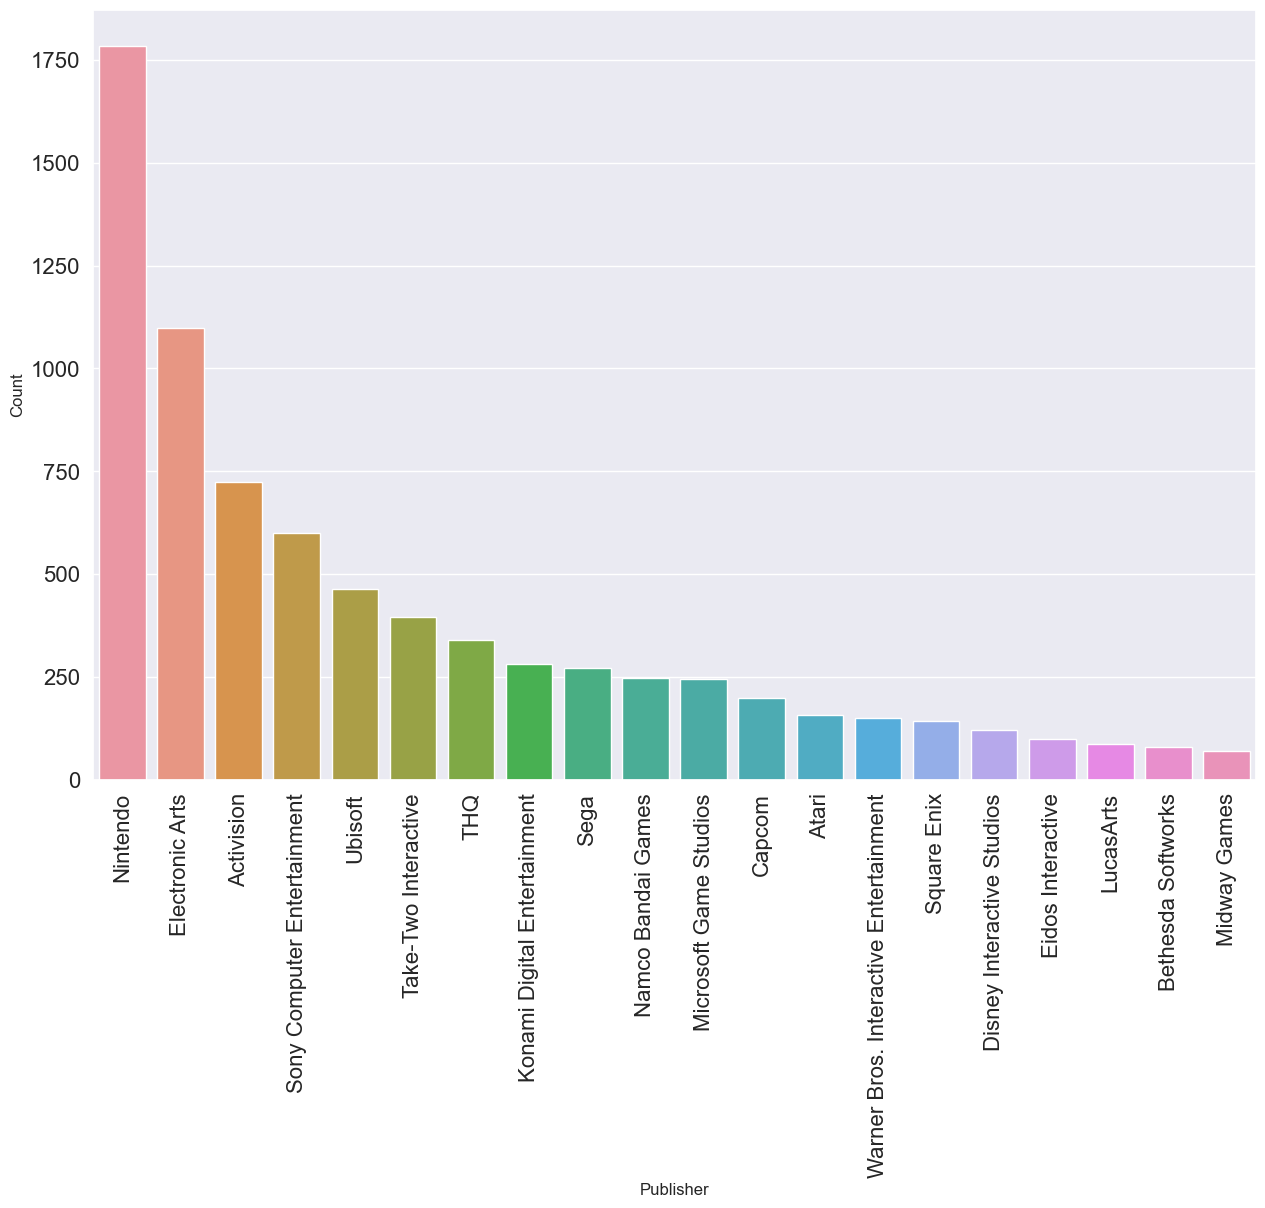

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x='Publisher', y='Count', data= global_publisher)
plt.xticks(size=16, rotation=90)
plt.yticks(size=16)

# Total revenue by region

In [27]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<AxesSubplot:xlabel='region', ylabel='sale'>

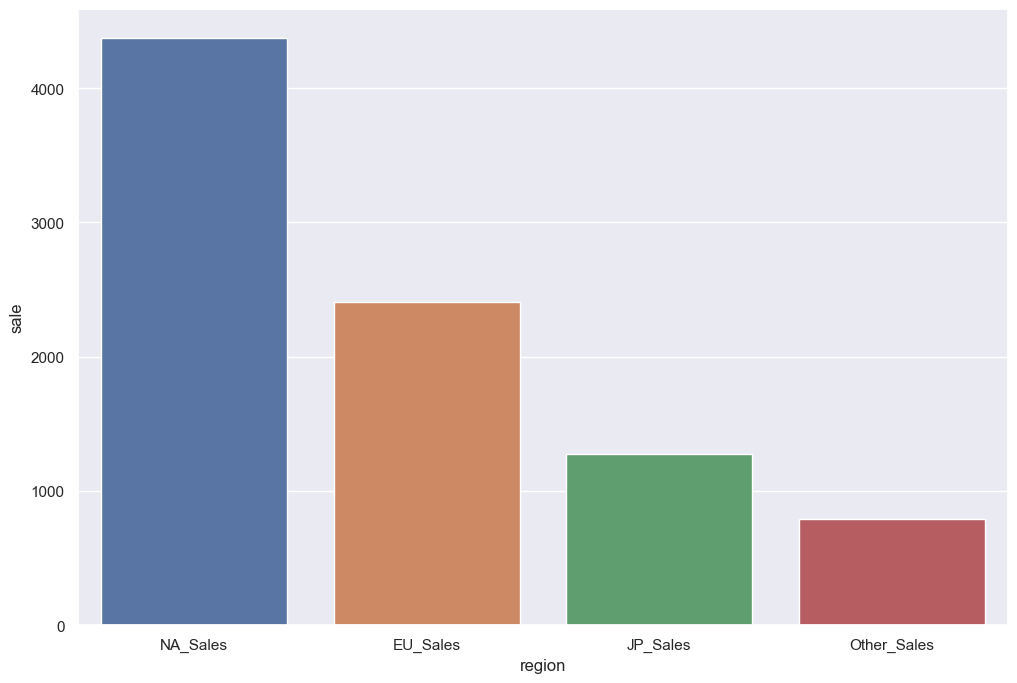

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

([<matplotlib.patches.Wedge at 0x192385bfbb0>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

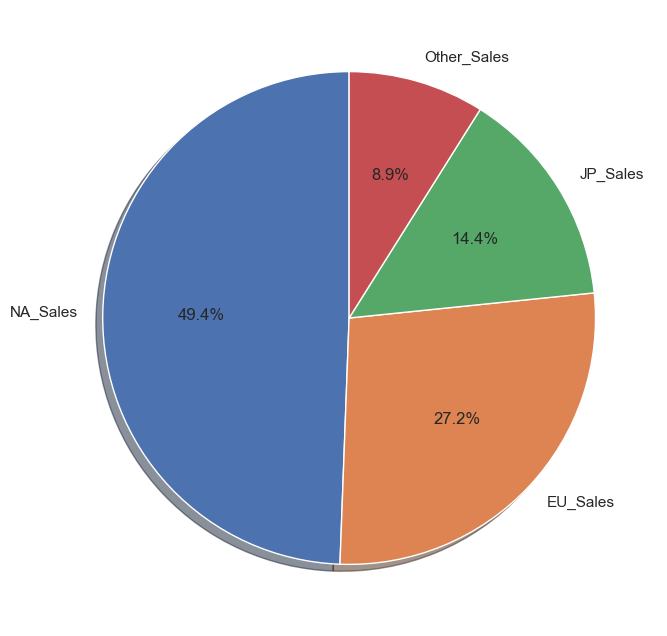

In [29]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

C:\Users\sthef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


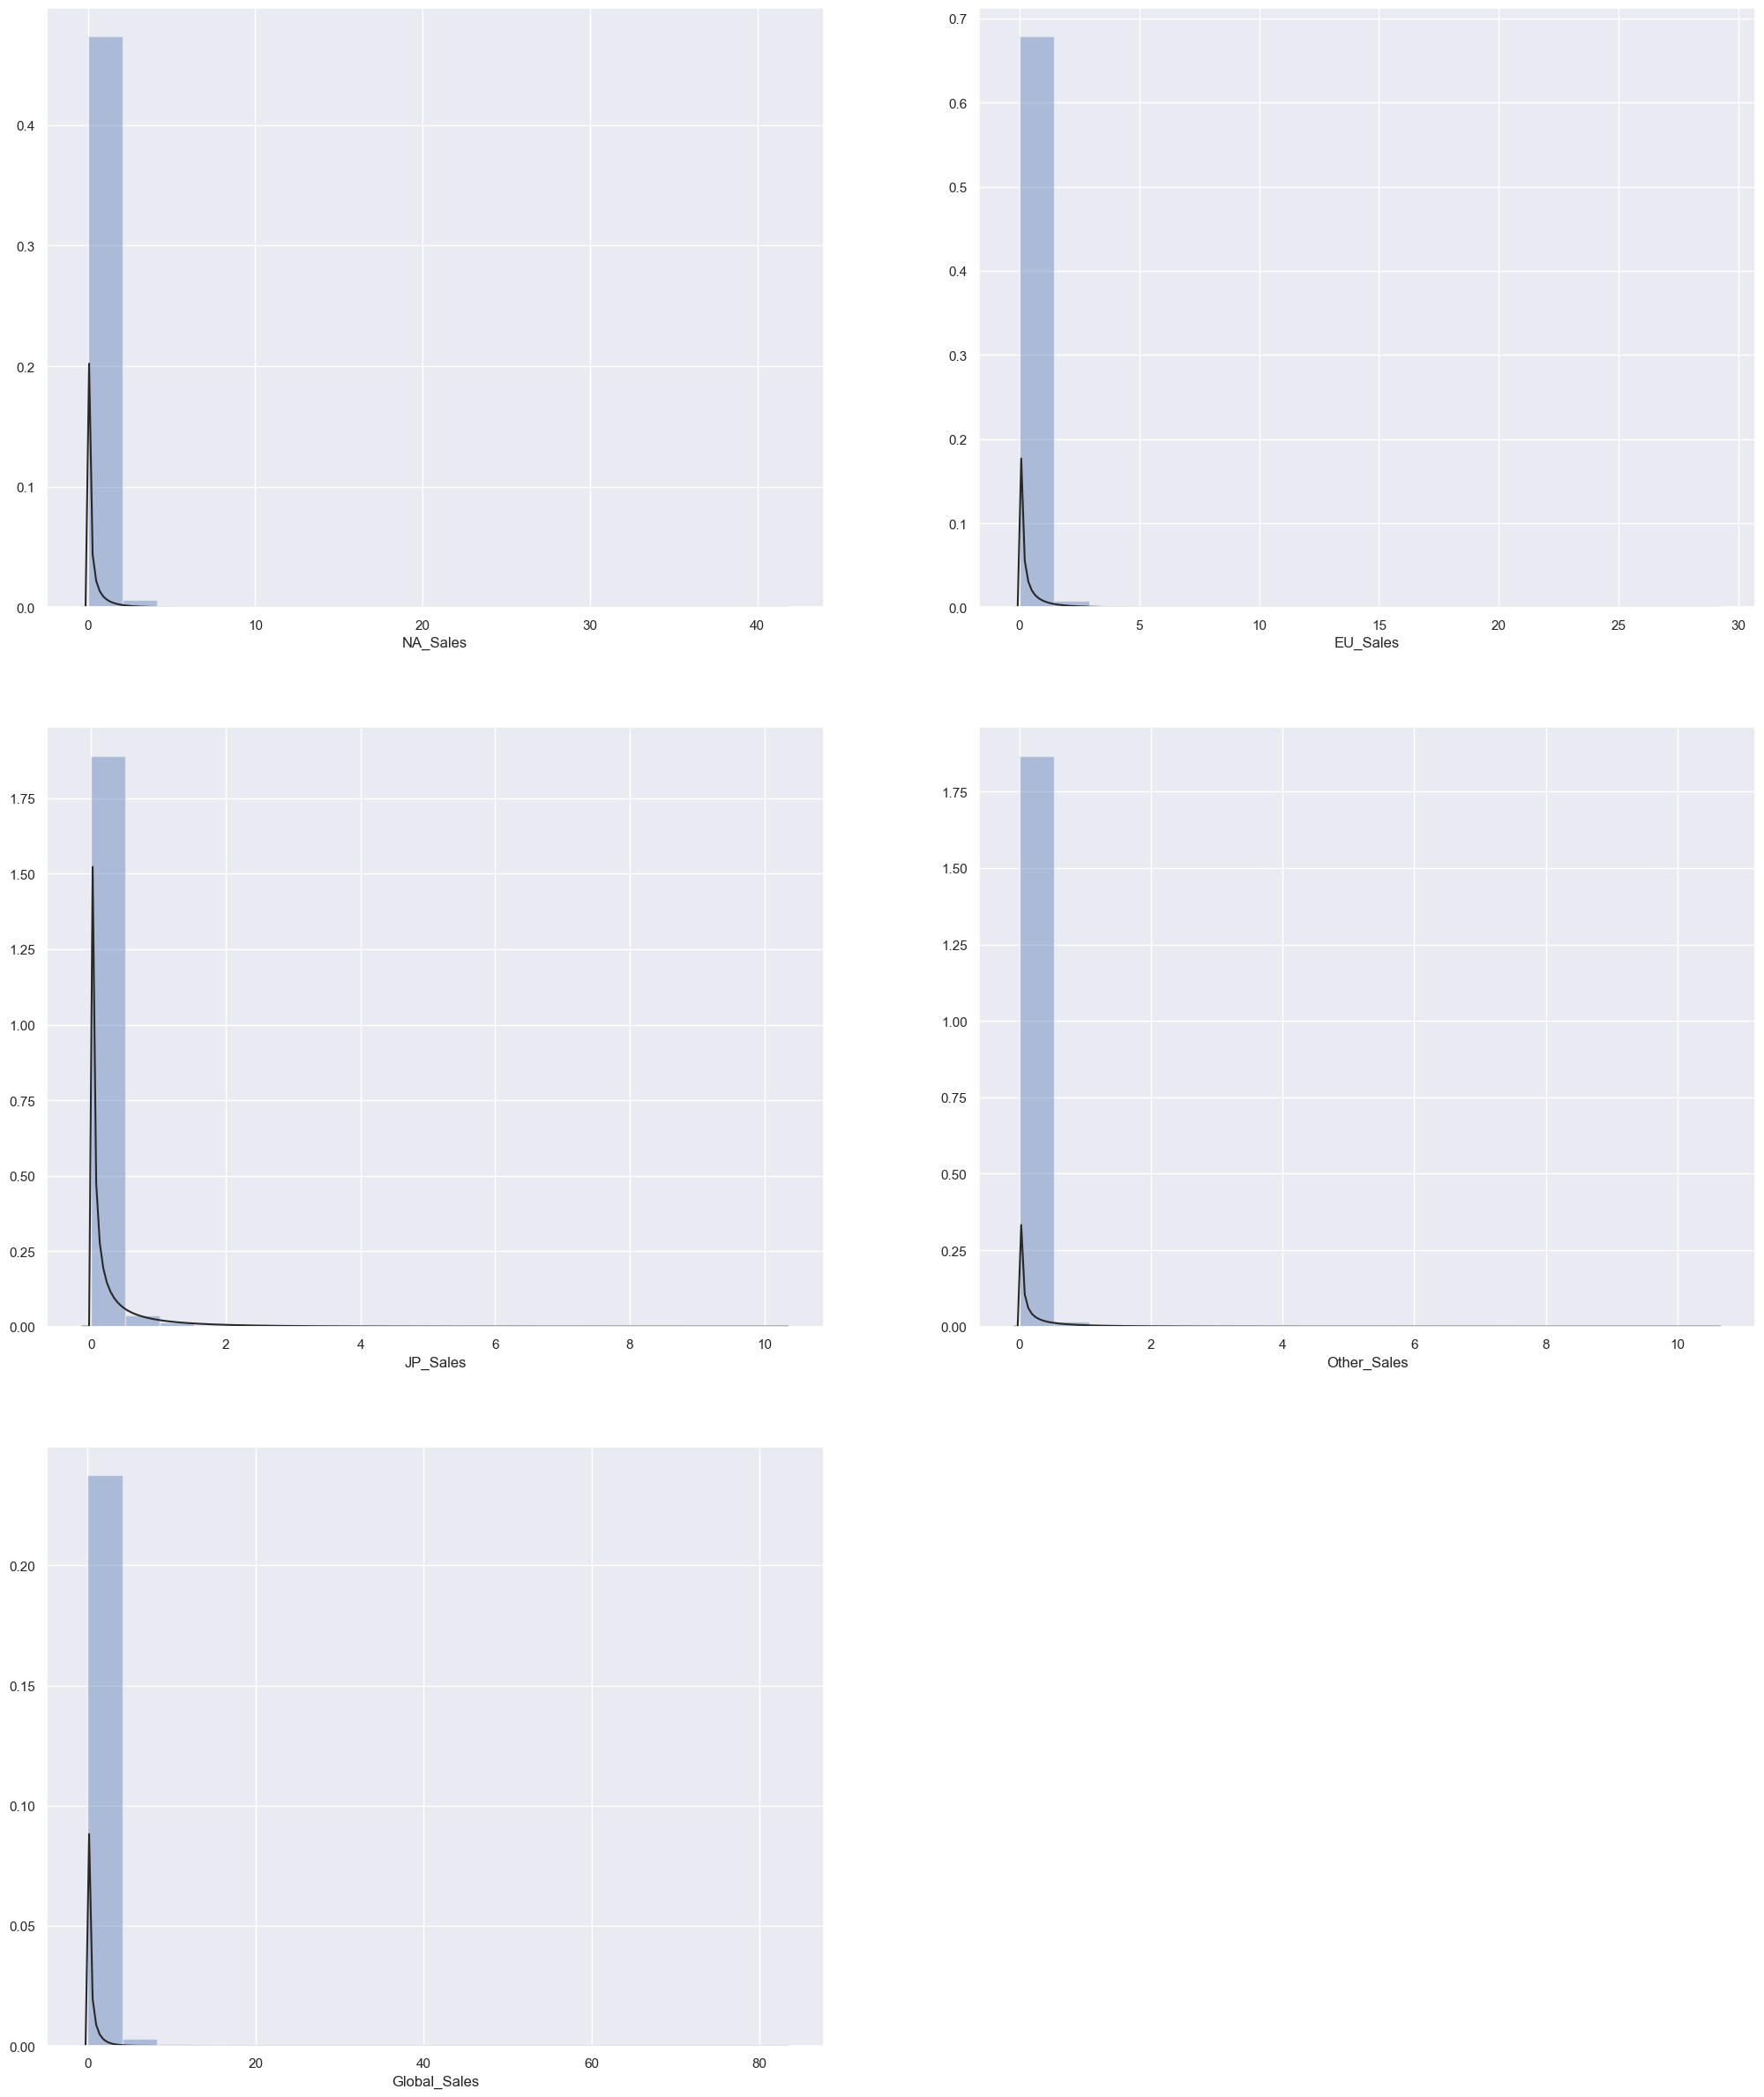

In [49]:
import scipy.stats as st
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=st.gamma)

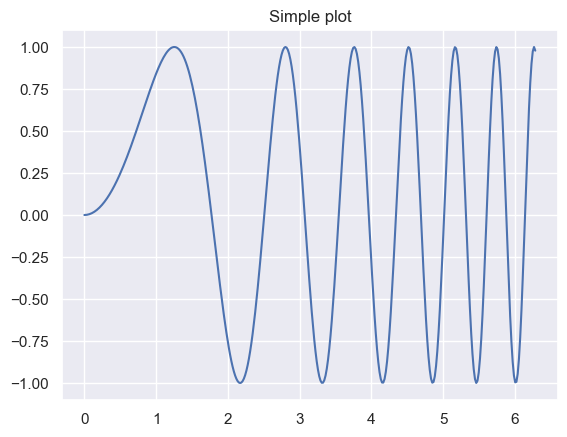

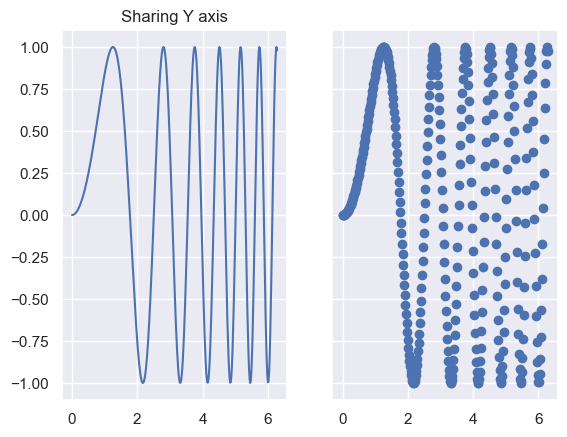

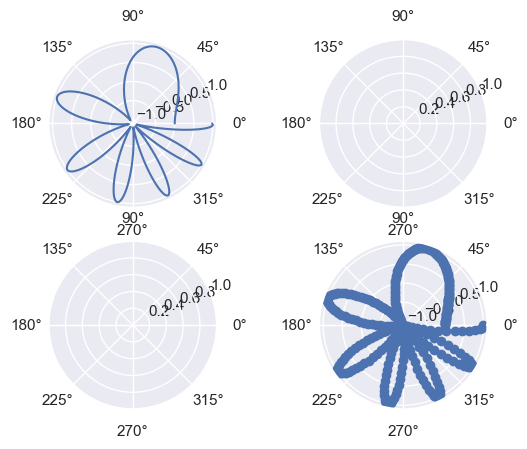

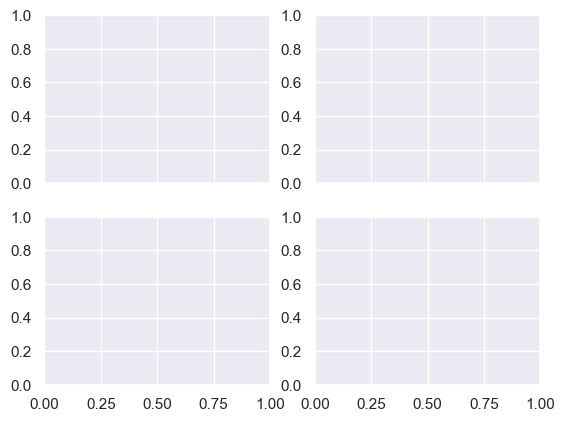

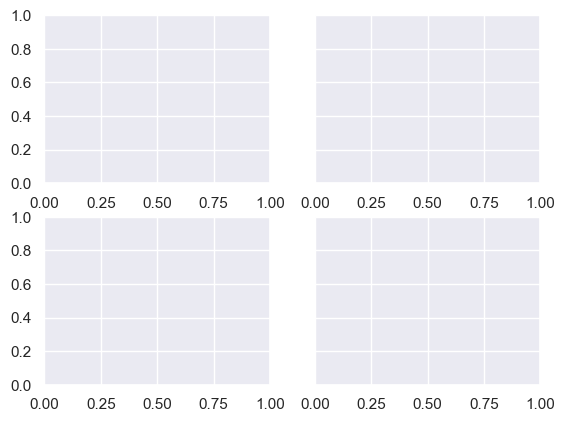

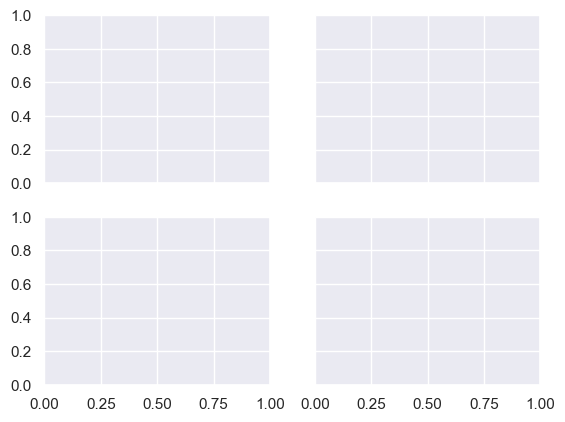

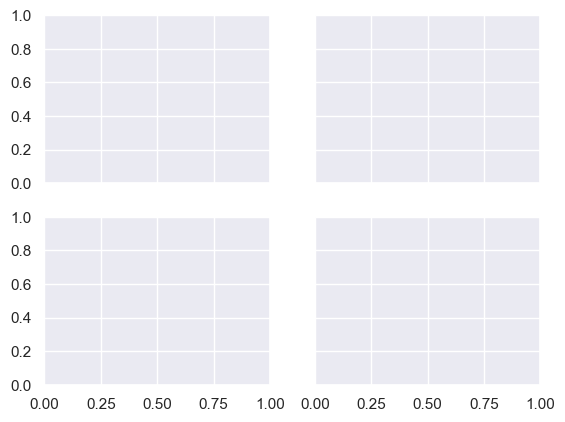

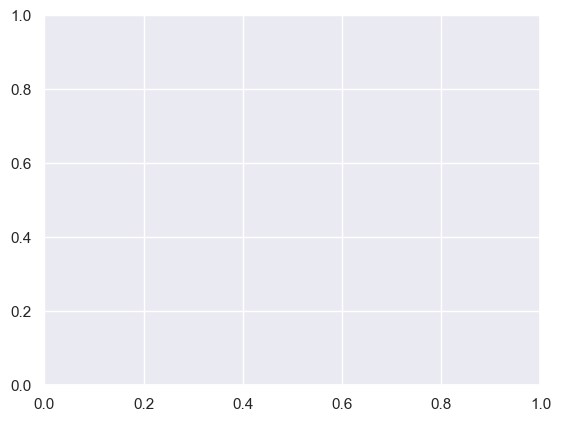

In [43]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 360)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

In [54]:
data_hist_log = data.copy()
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]
data_hist_log

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
11562,11564,Final Fantasy XI: Vana'diel Collection 2008,PS2,2007.0,Role-Playing,Square Enix,0.03,0.03,0.01,0.01,0.08
11838,11840,Mugen Souls Z,PS3,2013.0,Role-Playing,Nippon Ichi Software,0.02,0.01,0.04,0.01,0.07
11896,11898,Grand Kingdom,PSV,2015.0,Role-Playing,Nippon Ichi Software,0.01,0.02,0.04,0.01,0.07
13000,13002,Natural Doctrine,PS3,2014.0,Role-Playing,Nippon Ichi Software,0.03,0.01,0.01,0.01,0.05


C:\Users\sthef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


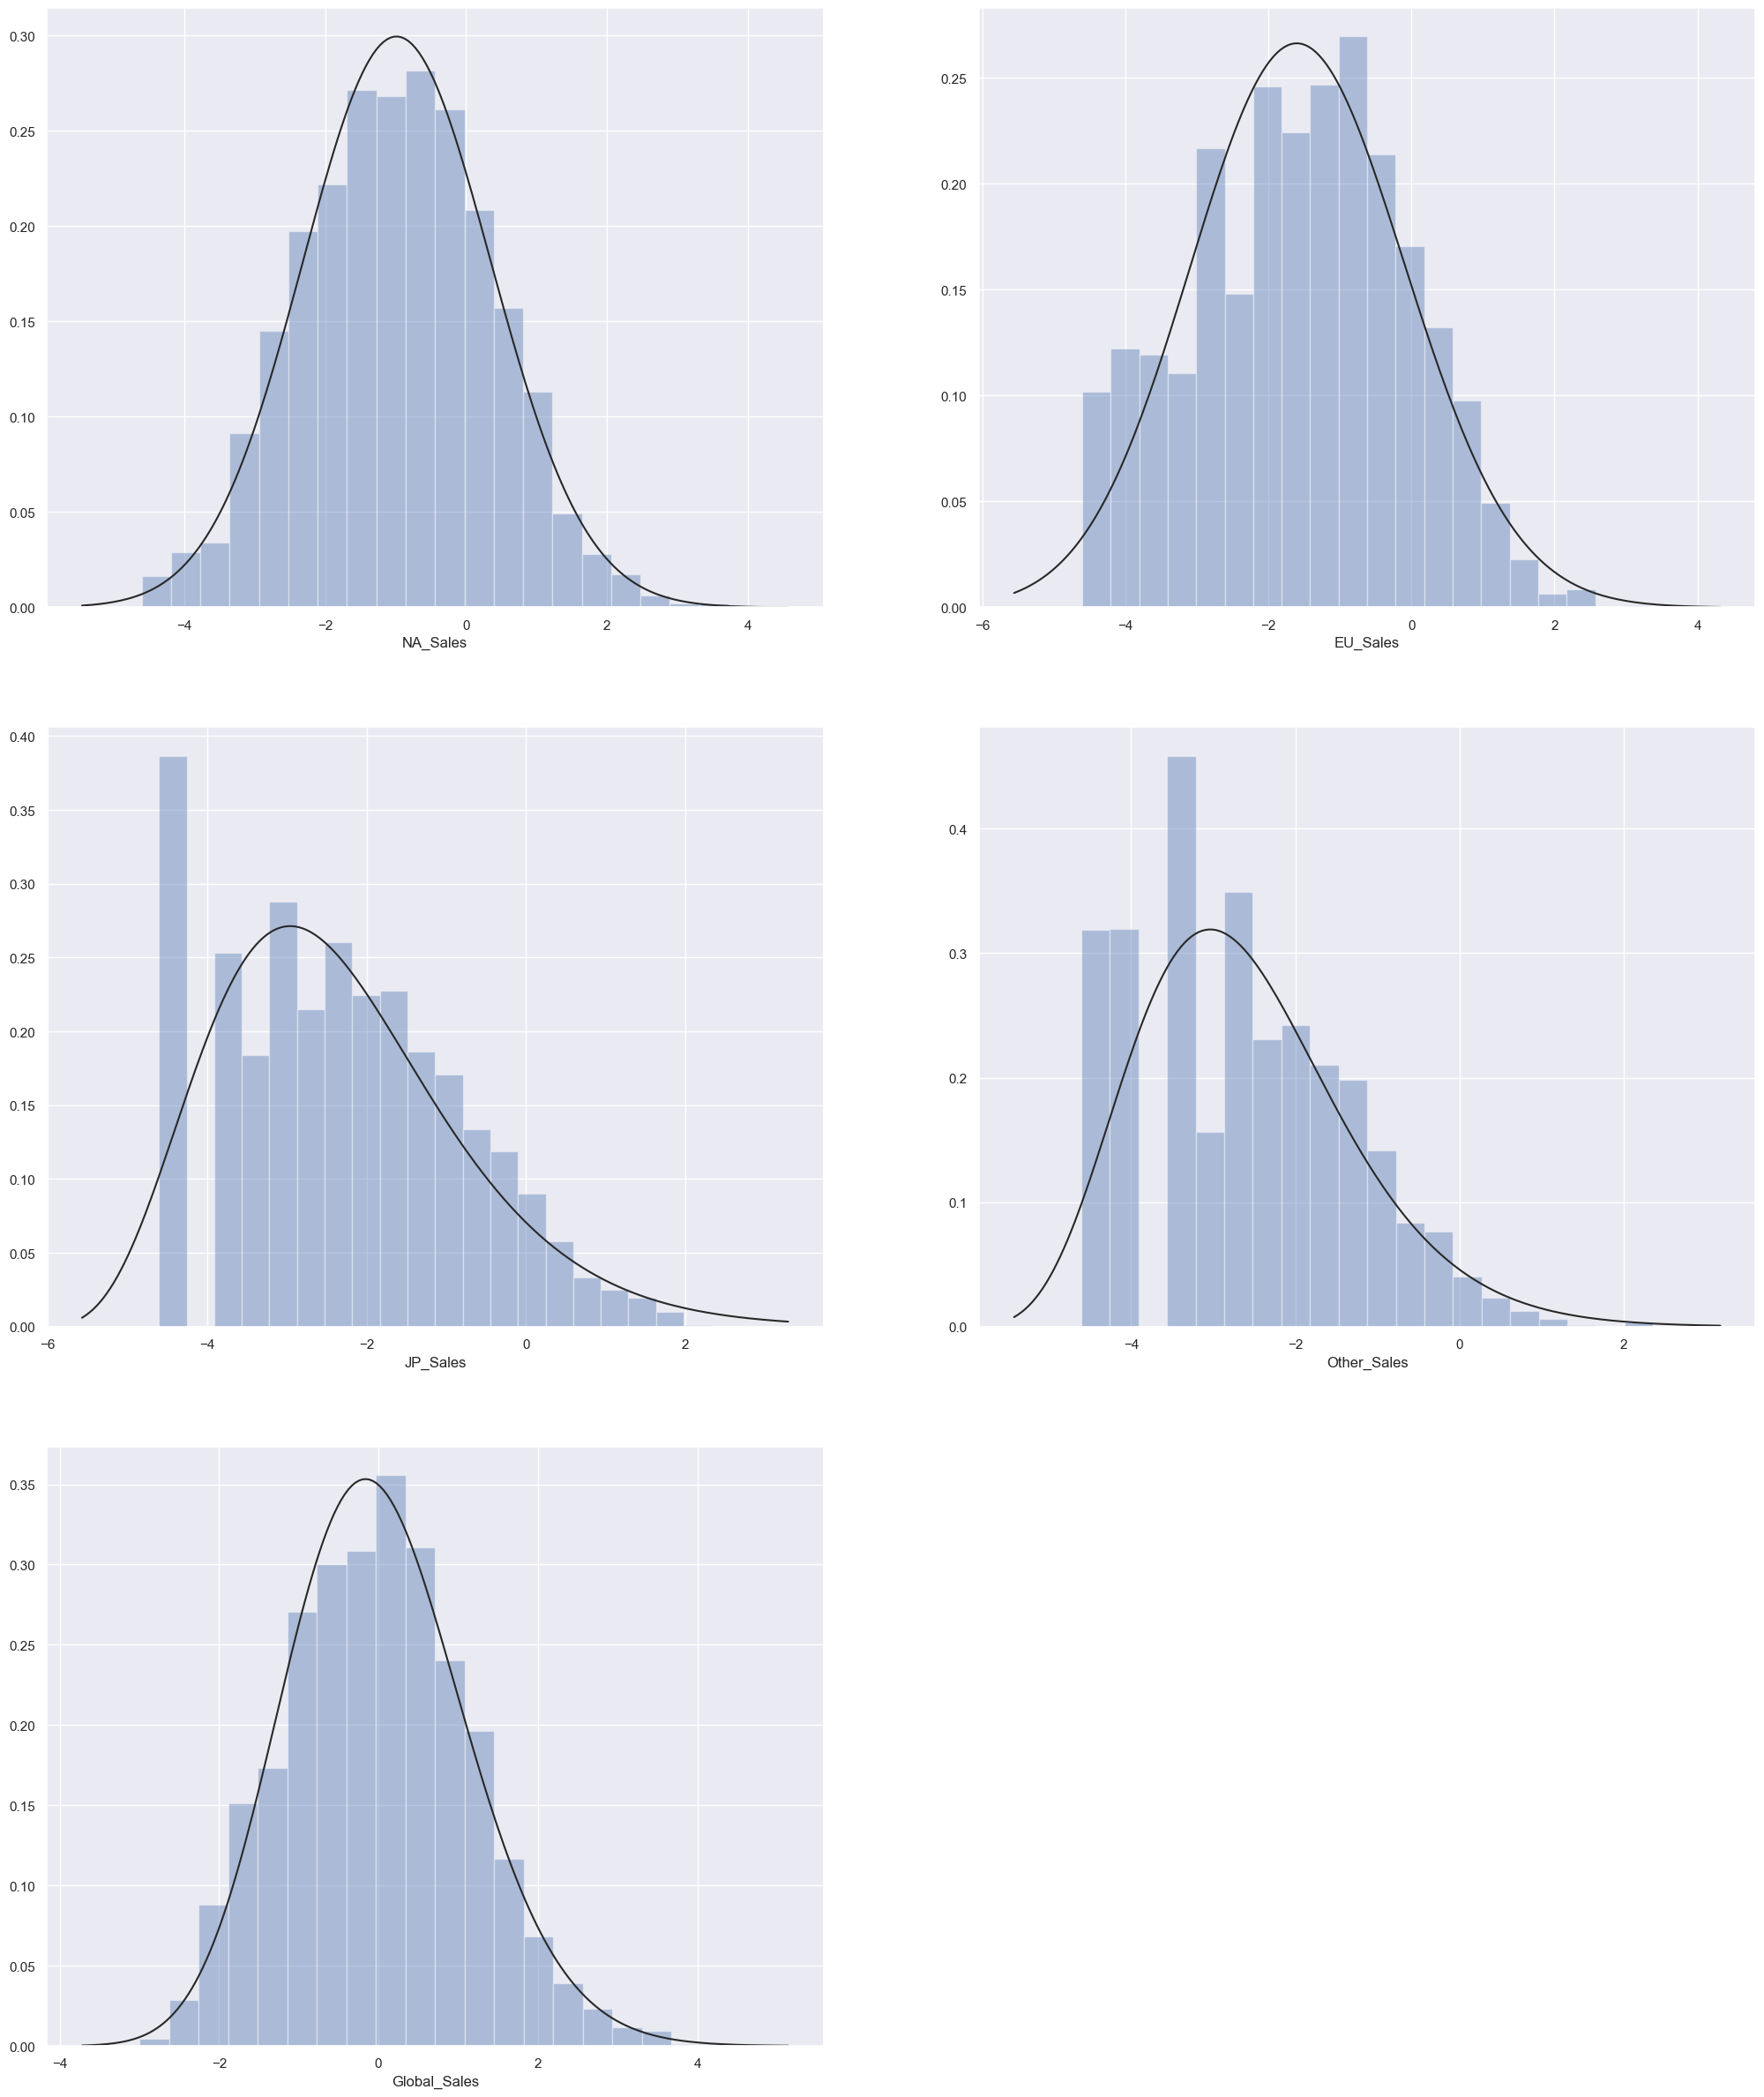

In [57]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=st.gamma)


# RELACION CON LAS COLUMNAS

<AxesSubplot:>

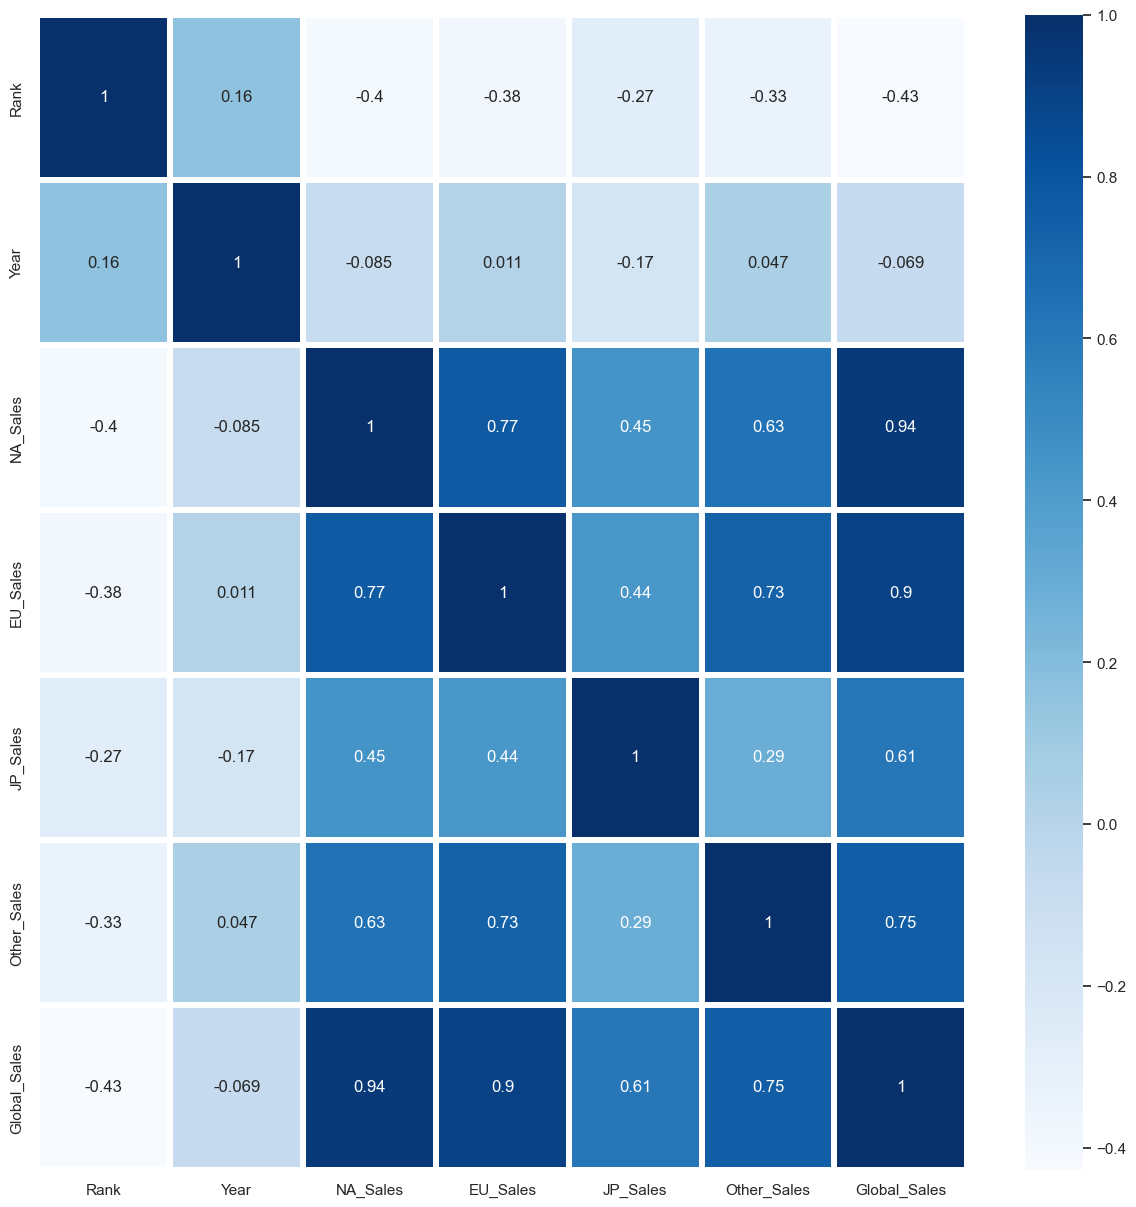

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(data= data.corr(), cmap = "Blues", annot=True, linewidth=3)

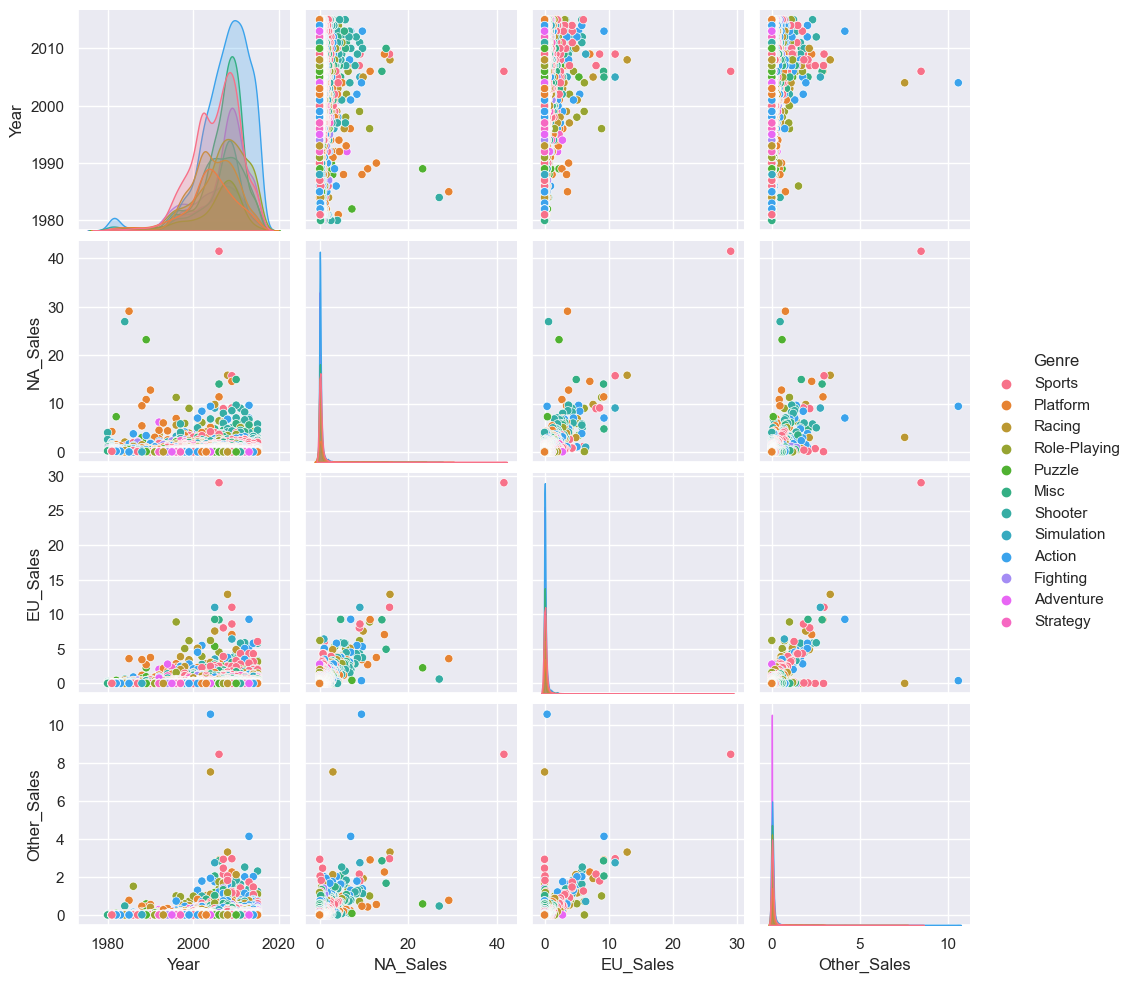

In [61]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
sns.pairplot(data_pair, hue='Genre')

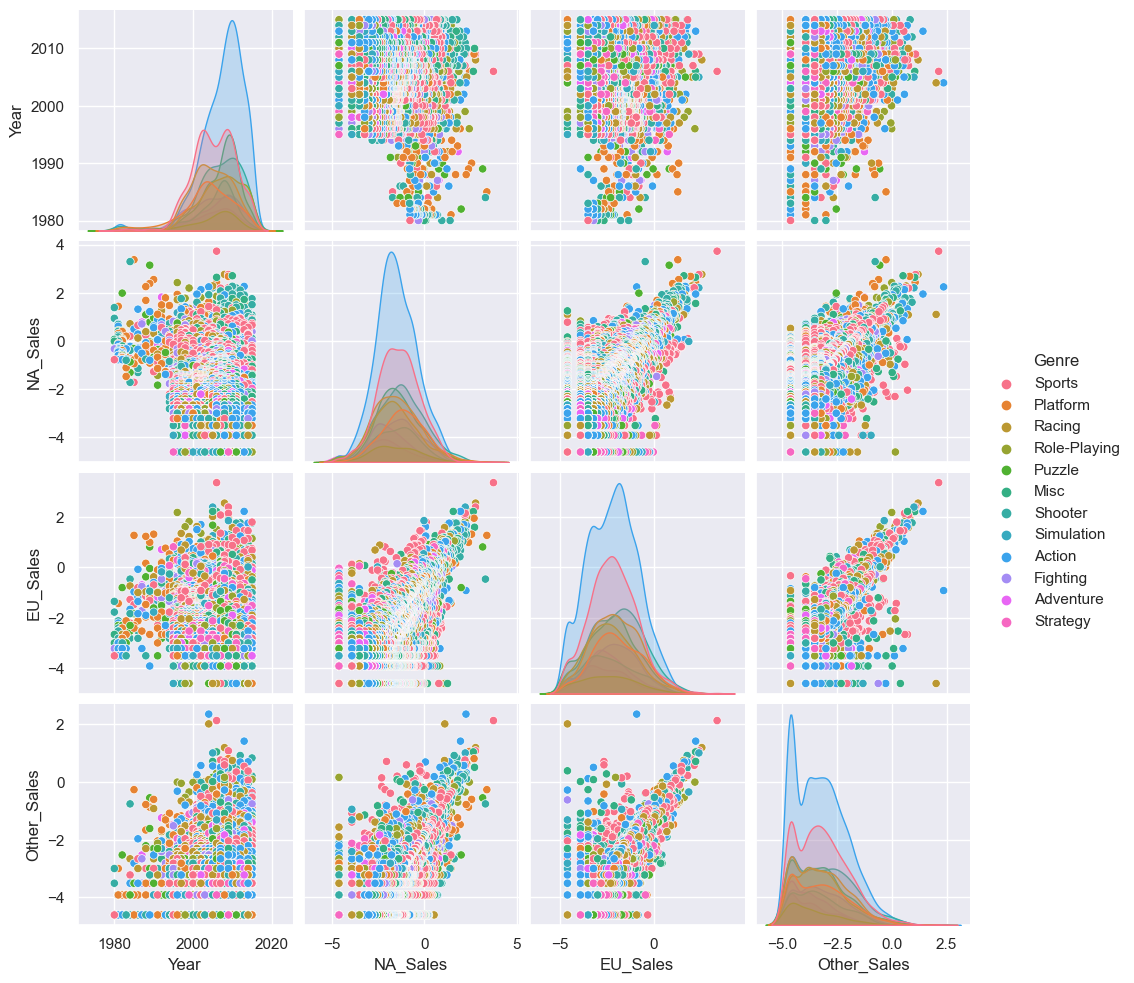

In [62]:
data_pair_log = data_pair.copy()
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
